In [1]:
import pandas as pd
import numpy as np
import re

## Loading the file

In [2]:
data = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\hamrobazar bikeslist\data.csv")
data.head()

Brand                           Name Lot No. Kilometers         Price
0  Aprilia                  Aprilla Sr150      96        15k  Rs. 2,00,000
1  Aprilia        Aprillia Rx 125 On Sale      2        1300  Rs. 6,00,000
2  Aprilia                  Aprilia Sr150      83      23000  Rs. 1,65,000
3  Aprilia              Apprillia On Sale      10       6000  Rs. 2,30,000
4  Aprilia  Urgent Sale Aprilia 150 Racer      84      15000  Rs. 1,80,000

## Understanding the data

### There are four features at total and price is our target value

In [3]:
data['Brand'].unique()

array(['Aprilia', 'Bajaj', 'Benelli', 'CF moto', 'Cross x', 'Crossfire',
       'Hartford', 'Hero', 'Honda', 'KTM', 'Mahindra', 'Motorhead',
       'Other Brands', 'Royal Enfield', 'Suzuki', 'TVS', 'Um', 'Vespa',
       'Yamaha'], dtype=object)

In [4]:
print(data['Name'].unique().shape)
print(data['Lot No.'].unique().shape)
print(data['Kilometers'].unique().shape)

(3719,)
(140,)
(842,)


### From above, it is seen that Brand is the categorical feature in our dataset whereas it is also clear that the other features are all non-categorical

In [5]:
data.isnull().sum()

Brand            0
Name             0
Lot No.          3
Kilometers    1316
Price            0
dtype: int64

### There are many null values present in the Kilometers columns and very few present in the Lot No. column

## Feature Engineering

### We will create a new feature that contains only the model name from the column Name

In [6]:
data[data['Brand']=='Aprilia']

Brand                                               Name Lot No.  \
0   Aprilia                                      Aprilla Sr150      96   
1   Aprilia                            Aprillia Rx 125 On Sale      2    
2   Aprilia                                      Aprilia Sr150      83   
3   Aprilia                                  Apprillia On Sale      10   
4   Aprilia                      Urgent Sale Aprilia 150 Racer      84   
5   Aprilia                              Aprilla Scooter Fress      93   
6   Aprilia                                    Aprila Race 150      47   
7   Aprilia                                  Aprilia Storm 125       -   
8   Aprilia    Aprilia Dorsoduro 750 Abs With Finance Facility      77   
9   Aprilia                              Aprilia 18lot On Sale      18   
10  Aprilia                            Aprilia Sr 125 On Sale.      96   
11  Aprilia                                 Daelim Classic 250      1    
12  Aprilia                                     Aprillia Sr150      02   
13  Aprilia                        Aprilia Sr 150 Race On Sale      99   
14  Aprilia                                      Aprilla Sr125      94   
15  Aprilia  Aprilia Sr 150 Cc Single Hand 7500 Run Sale On...      11   
16  Aprilia   Aprilla Sr150 Abs On Sale Or Exchange With Bike.      5    
17  Aprilia                                     Aprilia Rs 150      88   
18  Aprilia                                        Aprilia 150      12   
19  Aprilia                        Aprilia Sr 150 Race Edition      4    
20  Aprilia                                  Aprilia Etx 150cc      81   
21  Aprilia                                    Scooter Bigrima      13   
22  Aprilia                                     Aprilia Sr 150      10   
23  Aprilia             Aprilia 150 Sr Very Fresh Pradesh 3 02      02   
24  Aprilia                              Fresh Scooty On Sale.      02   
25  Aprilia                                Aprilia Sr 150 Race      -    
26  Aprilia                         Aprilia Sr 150 Urgent Sale      13   
27  Aprilia                    One Hand 125 Sr Aprila For Sale      03   
28  Aprilia                                     Aprilia Sr 125      -    
29  Aprilia                                      Aprilia Sr125      42   
30  Aprilia                                     Aprilia Sr 150      10   
31  Aprilia                                     Aprilla Sr 150      7    
32  Aprilia                                     Aprilia Sr 150      -    
33  Aprilia                                     Aprila On Sale      18   
34  Aprilia                                        Sr 150 Race      91   
35  Aprilia                                      Aprilia 150cc      03   
36  Aprilia                                      Aprilia Sr150      99   
37  Aprilia                          Fresh Aprilia Urgent Sell      07   
38  Aprilia                Aprilia Sr 125cc On Sale / Exchange      04   
39  Aprilia                         Aprilia Sr 125cc (006 Lot)      06   
40  Aprilia                                Aprilia Sr 150 Race      6    
41  Aprilia                                    Scooter On Sale      05   
42  Aprilia                                    Aprilla On Sale      24   
43  Aprilia                              Aprillia Etx 150 Bike      67   
44  Aprilia                                     Aprilia Sr 125      12   
45  Aprilia                                     Aprlila Sr 150      10   
46  Aprilia                                     Aprill On Sell      83   
47  Aprilia                             Aprilia Sr 150 On Sale      02   
48  Aprilia                                      Sr125 Scooter      42   
49  Aprilia                                     Sr 125 On Sale      17   
50  Aprilia                                      Aprilla Sr150      85   
51  Aprilia                                             Aprila      33   
52  Aprilia                           Aprilia Showroom Baglung       2   
53  Aprili

### From above, it is seen that the model for the brand Aprilia are SR 150, SR 125, RX 125, SR 150 RACE, Storm 125, Dorsoduro 750 ABS and ETX 150. We would be removing the data which specifies no model and just the brand name. Also, Daelim Classic is a separate brand so we would remove that one as well.

In [7]:
new_data = data[data['Brand']=='Aprilia']
model=[]
indexlist=[]
for index, row in new_data.iterrows():
    if re.findall('(?i).*race.*', row['Name'])!=[]:
        model.append('SR 150 RACE')
    elif re.findall('(?i).*sr.*150.*|(?i).*150.*sr.*', row['Name'])!=[]:
        model.append('SR 150')
    elif re.findall('(?i).*sr125.*|(?i).*sr 125.*', row['Name'])!=[]:
        model.append('SR 125')
    elif re.findall('(?i).*rx125.*|(?i).*rx 125.*', row['Name'])!=[]:
        model.append('RX 125')
    elif re.findall('(?i).*storm.*', row['Name'])!=[]:
        model.append('Storm 125')
    elif re.findall('(?i).*dorsoduro.*', row['Name'])!=[]:
        model.append('Dorsoduro 750 ABS')
    elif re.findall('(?i).*etx150.*|(?i).*etx 150.*', row['Name'])!=[]:
        model.append('ETX 150')
    else:
        indexlist.append(index)
        model.append(row['Name'])

<ipython-input-7-37654d9f7cc2>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*sr.*150.*|(?i)' (truncated)
  elif re.findall('(?i).*sr.*150.*|(?i).*150.*sr.*', row['Name'])!=[]:
<ipython-input-7-37654d9f7cc2>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*sr125.*|(?i).*' (truncated)
  elif re.findall('(?i).*sr125.*|(?i).*sr 125.*', row['Name'])!=[]:
<ipython-input-7-37654d9f7cc2>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*rx125.*|(?i).*' (truncated)
  elif re.findall('(?i).*rx125.*|(?i).*rx 125.*', row['Name'])!=[]:
<ipython-input-7-37654d9f7cc2>:17: DeprecationWarning: Flags not at the start of the expression '(?i).*etx150.*|(?i).' (truncated)
  elif re.findall('(?i).*etx150.*|(?i).*etx 150.*', row['Name'])!=[]:


In [8]:
pd.set_option('display.max_rows', None) # To see all the rows
data[data['Brand']=='Bajaj']

Brand                                               Name Lot No.  \
55    Bajaj                           Bajaj Pulsar Dtsi 150 Cc      10   
56    Bajaj                                     Avenger 150 Cc      79   
57    Bajaj                              Ns 200 85 Lot On Sale      85   
58    Bajaj                        Fresh Ns 200 On Urgent Sell      94   
59    Bajaj                                        Dominar 400      83   
60    Bajaj                                         Pulsar 220      85   
61    Bajaj                                    Bajaj 220 Fresh      78   
62    Bajaj                                         220 Pulsar      82   
63    Bajaj                                 Pulsar 180 On Sale      42   
64    Bajaj                                   Bajaj Wind 125cc       3   
65    Bajaj                                              Rs200      87   
66    Bajaj                                      3-2-2 Bikrima      10   
67    Bajaj                  Fresh Pulsar Ns 200 - Urgent Sale      58   
68    Bajaj                                    Rs 200 For Sale      79   
69    Bajaj                                     Ns 200 On Sale      97   
70    Bajaj                                    Ns 200 Black ..      85   
71    Bajaj                                          Pulsar150      51   
72    Bajaj                                     Ns 200 On Sale      61   
73    Bajaj                             Pulsar 220f (like New)      49   
74    Bajaj                                   Bajaj 220 Pulsar      58   
75    Bajaj                               92 Lot Pulsar 200 Ns      92   
76    Bajaj                                       Black Rs 200      89   
77    Bajaj                            Benelli Tnt 135 On Sale      87   
78    Bajaj                                 As 150 Urgent Sell      69   
79    Bajaj                                         Pulsar-180      45   
80    Bajaj                            Avenger 220 (2016)model      13   
81    Bajaj                                        Dominar 400      84   
82    Bajaj                                     200 Ns On Sale      53   
83    Bajaj                        One Hand 150 Pulsar Bikrima      42   
84    Bajaj                                             Rs 200      70   
85    Bajaj      Pulsar 220f On Sale Or Exchange With Scooter.      94   
86    Bajaj                                   Bajaj Pulsar 150      83   
87    Bajaj                                         150 Pulsar      69   
88    Bajaj                                      Pulsar Ns 200      03   
89    Bajaj                                    Dominar On Sale      14   
90    Bajaj                                      Pulsar Ns 200      04   
91    Bajaj                                      Pulsar 220 82      82   
92    Bajaj                                      Bajaj Avenger      80   
93    Bajaj                           Hire For Bike,pulsar 180      25   
94    Bajaj                                         Pulsar 220      28   
95    Bajaj                                      Pulsar 200 Ns      78   
96    Bajaj                                             Ns 200      63   
97    Bajaj                                        Ns 200 Sell      01   
98    Bajaj                                      Pulsar As 150      70   
99    Bajaj                                          Ns 200 53      53   
100   Bajaj                                   Bike Urgent Sale      53   
101   Bajaj                                     Ns 200 On Sale      16   
102   Bajaj                                             Ns 200      14   
103   Bajaj                                   Bajaj Pulsar 220      40   
104   Bajaj                                 Pulsar 220 On Sale      66   
105   Bajaj                                         Pulsar 150      56   
106   Bajaj                                             Ns 200      83   
107   Bajaj                                      Pulsar As 150      72   
108   Baja

### From above, it is seen that the model for the bajaj brand are Pulsar 150 Dtsi, Avenger 150, Pulsar NS 200, Dominar 400, Pulsar 220F, Pulsar 180, Wind 125, Pulsar RS 200, Pulsar 150, Pulsar AS 150, Pulsar 220F ABS, Discover 125, Avenger Street 160 ABS, Platina, Pulsar 150 TD, Pulsar NS 160, Wave, Discover 150, Avenger Street 180, Avenger Cruise 220, Avenger Street 220, V15, Discover 100 T and Discover 135. We will eliminate all others except these ones.

In [9]:
new_data = data[data['Brand']=='Bajaj']
for index, row in new_data.iterrows():
    if re.findall('(?i).*dtsi.*', row['Name'])!=[]:
        model.append('Pulsar 150 Dtsi')
    elif re.findall('(?i).*avenger.*150.*|(?i).*150.*avenger.*', row['Name'])!=[]:
        model.append('Avenger 150')
    elif re.findall('(?i).*dominar 400.*|(?i).*dominar400.*|(?i).*400 dominar.*|(?i).*400dominar.*', row['Name'])!=[]:
        model.append('Dominar 400')
    elif re.findall('(?i).*pul.*180.*|(?i).*180.*pul.*', row['Name'])!=[]:
        model.append('Pulsar 180')
    elif re.findall('(?i).*wind125.*|(?i).*wind 125.*|(?i).*125 wind.*|(?i).*125wind.*', row['Name'])!=[]:
        model.append('Wind 125')
    elif re.findall('(?i).*rs.*200.*|(?i).*200.*rs.*', row['Name'])!=[]:
        model.append('Pulsar RS 200')
    elif re.findall('(?i).*as.*150.*|(?i).*150.*as.*', row['Name'])!=[]:
        model.append('Pulsar AS 150')
    elif re.findall('(?i).*as.*200.*|(?i).*200.*as.*', row['Name'])!=[]:
        model.append('Pulsar AS 200')
    elif re.findall('(?i).*ns.*200.*|(?i).*200.*ns.*|(?i).*bajaj.*200.*|(?i).*200.*bajaj.*|(?i).*pul.*200.*|(?i).*200.*pul.*', row['Name'])!=[]:
        model.append('Pulsar NS 200')

    elif re.findall('(?i).*220 abs.*|(?i).*220abs.*|(?i).*abs220.*|(?i).*abs 220.*', row['Name'])!=[]:
        model.append('Pulsar 220F ABS')
    elif re.findall('(?i).*discover.*125.*|(?i).*125.*discover.*', row['Name'])!=[]:
        model.append('Discover 125')
    elif re.findall('(?i).*160 abs.*|(?i).*160abs.*|(?i).*abs160.*|(?i).*abs 160.*', row['Name'])!=[]:
        model.append('Avenger Street 160 ABS')
    elif re.findall('(?i).*platina.*', row['Name'])!=[]:
        model.append('Platina')
    elif re.findall('(?i).*td 150.*|(?i).*td150.*|(?i).*150 td.*|(?i).*150td.*', row['Name'])!=[]:
        model.append('Pulsar 150 TD')
    elif re.findall('(?i).*pul.*150.*|(?i).*150.*pul.*|(?i).*pal.*150.*|(?i).*150.*pal.*|(?i).*150.*', row['Name'])!=[]:
        model.append('Pulsar 150')
    elif re.findall('(?i).*ns 160.*|(?i).*ns160.*|(?i).*160 ns.*|(?i).*160ns.*', row['Name'])!=[]:
        model.append('Pulsar NS 160')
    elif re.findall('(?i).*wave.*', row['Name'])!=[]:
        model.append('Wave')
    elif re.findall('(?i).*discover.*150.*|(?i).*150.*discover.*', row['Name'])!=[]:
        model.append('Discover 150')
    elif re.findall('(?i).*street180.*|(?i).*street 180.*|(?i).*180street.*|(?i).*180 street.*', row['Name'])!=[]:
        model.append('Avenger Street 180')
    elif re.findall('(?i).*cru.*220.*|(?i).*220.*cru.*|(?i).*avenger.*220.*|(?i).*220.*avenger.*', row['Name'])!=[]:
        model.append('Avenger Cruise 220')
    elif re.findall('(?i).*street220.*|(?i).*street 220.*|(?i).*220street.*|(?i).*220 street.*', row['Name'])!=[]:
        model.append('Avenger Street 220')
    elif re.findall('(?i).*avenger.*220.*|(?i).*220.*avenger.*', row['Name'])!=[]:
        model.append('Avenger 220')
    elif re.findall('(?i).*pul.*220.*|(?i).*220.*pul.*|(?i).*220f.*|.*220.*', row['Name'])!=[]:
        model.append('Pulsar 220F')
    elif re.findall('(?i).*v15.*|(?i).*v-15.*', row['Name'])!=[]:
        model.append('V15')
    elif re.findall('(?i).*100t.*|(?i).*100 t.*', row['Name'])!=[]:
        model.append('Discover 100T')
    elif re.findall('(?i).*discover.*135.*|(?i).*135.*discover.*', row['Name'])!=[]:
        model.append('Discover 135')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-9-cf1a67ed6bee>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*avenger.*150.*' (truncated)
  elif re.findall('(?i).*avenger.*150.*|(?i).*150.*avenger.*', row['Name'])!=[]:
<ipython-input-9-cf1a67ed6bee>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*dominar 400.*|' (truncated)
  elif re.findall('(?i).*dominar 400.*|(?i).*dominar400.*|(?i).*400 dominar.*|(?i).*400dominar.*', row['Name'])!=[]:
<ipython-input-9-cf1a67ed6bee>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*pul.*180.*|(?i' (truncated)
  elif re.findall('(?i).*pul.*180.*|(?i).*180.*pul.*', row['Name'])!=[]:
<ipython-input-9-cf1a67ed6bee>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*wind125.*|(?i)' (truncated)
  elif re.findall('(?i).*wind125.*|(?i).*wind 125.*|(?i).*125 wind.*|(?i).*125wind.*', row['Name'])!=[]:
<ipython-input-9-cf1a67ed6bee>:13: DeprecationWarning: Flags not at the start of the expression '(?i).*

In [10]:
data[data['Brand']=='Benelli']

Brand                                               Name Lot No.  \
1107  Benelli                             Benelli Tnt 600i (abs)      87   
1108  Benelli                                      Benelli Tnt25      78   
1109  Benelli        Benelli 135 On Sale Or Exchange Wit Scooter      87   
1110  Benelli                            Benelli Tnt 300 On Sell      74   
1111  Benelli                                    Benelli Trk 251      58   
1112  Benelli                                    Benelli Trk 251      7    
1113  Benelli                                       Leoncino 500      82   
1114  Benelli                                       Benelli 302r      90   
1115  Benelli                        Benelli 302s (abs) For Sale      2    
1116  Benelli                            Benelli Tnt300 For Sale      84   
1117  Benelli                                    Benelli Trk 251      1    
1118  Benelli                                    Benelli Tnt 300      13   
1119  Benelli                                     Tnt 25 Benelli      82   
1120  Benelli                                        Benelli 300      80   
1121  Benelli                                    Tnt Benelli 300      13   
1122  Benelli                                   Benelli 300. Abs      96   
1123  Benelli                             Benelli Tnt 135 Beneli      87   
1124  Benelli                                        Benelli 250      78   
1125  Benelli                           Benelli 300 With Ixil 55      75   
1126  Benelli                               Benelli 302r On Sale      37   
1127  Benelli                    Benelli 150 Hurry Up Its Urgent      Ne   
1128  Benelli                            Benelli Tnt 300 On Sell      86   
1129  Benelli    Benelli Tnt 300 90lot Red Color For Urgent Sale      90   
1130  Benelli                                       Benelli 302s      00   
1131  Benelli                                       Benelli 302r      90   
1132  Benelli                             Benelli Tnt 25 On Sale      82   
1133  Benelli                    Benelli 150i Tnt Fresh Like New      15   
1134  Benelli                                     Benelli Tnt135      07   
1135  Benelli                Benelli 300 Exchange Also Available      90   
1136  Benelli                           Urgent Sale Benelli 150i      08   
1137  Benelli                                            Benelli      02   
1138  Benelli                Benelli Tnt 300 Motorcycle For Sale      92   
1139  Benelli                     Urgent Sell Benelli 302r 92lot      92   
1140  Benelli                    Fresh One Hand Benelli For Sale      04   
1141  Benelli                                     Benelli Tnt 25      82   
1142  Benelli                                       Benelli 302r      92   
1143  Benelli           Benelli Tornado 302r Bike On Urgent Sale      92   
1144  Benelli                          Benelli 150i Glass Coated      05   
1145  Benelli                                     Benelli Tnt 15      8    
1146  Benelli                  Benelli Tnt 300 | 300 Cc | 86 Lot      86   
1147  Benelli                                    Benelli Tnt 300      13   
1148  Benelli         Benelli Tnt 300 Abs 90 Lot For Urgent Sale      90   
1149  Benelli                         Benelli Tnt 300cc (72 Lot)      72   
1150  Benelli                                     Benelli Tnt300      99   
1151  Benelli                              250nk Sale / Exchange      05   
1152  Benelli            Benelli Tnt 300 With Akrapovic Exhaust.      96   
1153  Benelli                Benelli 302r (018 Lot Anchalikaran)      01   
1154  Benelli                                    Benelli Tnt 300      73   
1155  Benelli                                     Benelli Tnt300      92   
1156  Benelli                                    Benelli Trk 251      Na   
1157  Benelli                            Benelli Tnt 25 For Sale      82   
1158  Benelli                                   Benelli 

### From above, it is seen that the model for the brand Benelli are TNT 600i, TNT 25, TNT 135, TNT 300, TRK 251, Leoncino 500, 302 R, 302 S, TNT 150, TNT 150i, TNT 15, BN 251, Leoncino 251 and Zenzero 150. All others will be eliminated

In [11]:
new_data = data[data['Brand']=='Benelli']
for index, row in new_data.iterrows():
    if re.findall('(?i).*600i.*|.*600', row['Name'])!=[]:
        model.append('TNT 600i')
    elif re.findall('(?i).*tnt.*25.*|(?i).*25.*tnt.*', row['Name'])!=[]:
        model.append('TNT 25')
    elif re.findall('(?i).*tnt.*135.*|(?i).*135.*tnt.*|.*135.*', row['Name'])!=[]:
        model.append('TNT 135')
    elif re.findall('(?i).*tnt.*300.*|(?i).*300.*tnt.*|.*300.*', row['Name'])!=[]:
        model.append('TNT 300')
    elif re.findall('(?i).*tnt.*150.*|(?i).*150.*tnt.*', row['Name'])!=[]:
        model.append('TNT 150')
    elif re.findall('(?i).*trk.*251.*|(?i).*251.*trk.*', row['Name'])!=[]:
        model.append('TRK 251')
    elif re.findall('(?i).*leoncino.*500.*|(?i).*500.*leoncino.*', row['Name'])!=[]:
        model.append('Leoncino 500')
    elif re.findall('(?i).*302.*r.*|(?i).*r.*302.*', row['Name'])!=[]:
        model.append('302 R')
    elif re.findall('(?i).*302.*s.*|(?i).*s.*302.*', row['Name'])!=[]:
        model.append('302 S')
    elif re.findall('(?i).*150.*i.*', row['Name'])!=[]:
        model.append('TNT 150i')
    elif re.findall('(?i).*tnt.*15.*|(?i).*15.*tnt.*', row['Name'])!=[]:
        model.append('TNT 15')
    elif re.findall('(?i).*bn.*251.*|(?i).*251.*bn.*', row['Name'])!=[]:
        model.append('BN 251')
    elif re.findall('(?i).*leoncino.*251.*|(?i).*251.*leoncino.*', row['Name'])!=[]:
        model.append('Leoncino 251')
    elif re.findall('(?i).*zenzero.*150.*|(?i).*150.*zenzero.*', row['Name'])!=[]:
        model.append('Leoncino 251')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-11-fa43b6bad4ec>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*tnt.*25.*|(?i)' (truncated)
  elif re.findall('(?i).*tnt.*25.*|(?i).*25.*tnt.*', row['Name'])!=[]:
<ipython-input-11-fa43b6bad4ec>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*tnt.*135.*|(?i' (truncated)
  elif re.findall('(?i).*tnt.*135.*|(?i).*135.*tnt.*|.*135.*', row['Name'])!=[]:
<ipython-input-11-fa43b6bad4ec>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*tnt.*300.*|(?i' (truncated)
  elif re.findall('(?i).*tnt.*300.*|(?i).*300.*tnt.*|.*300.*', row['Name'])!=[]:
<ipython-input-11-fa43b6bad4ec>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*tnt.*150.*|(?i' (truncated)
  elif re.findall('(?i).*tnt.*150.*|(?i).*150.*tnt.*', row['Name'])!=[]:
<ipython-input-11-fa43b6bad4ec>:13: DeprecationWarning: Flags not at the start of the expression '(?i).*trk.*251.*|(?i' (truncated)
  elif re.findall('(?i).*trk.*251.*|(

In [12]:
data[data['Brand']=='CF moto']

Brand                                               Name Lot No.  \
1230  CF moto  Nk 400 Very Fresh For Sale Or Exchange With Di...      09   
1231  CF moto                                   Cfmoto St. Papio      99   
1232  CF moto                             Nk150 One Hand On Sell      88   
1233  CF moto                                     Cf Moto Nk 250      02   
1234  CF moto                                            On Sell      03   
1235  CF moto                                     Cf Moto Nk 250      98   
1236  CF moto                              Cf Moto 150nk On Sale      91   
1237  CF moto                                       Bike On Sale      03   
1238  CF moto                                       Cfmoto 250nk      99   
1239  CF moto                                     Cf Moto Nk 400      94   
1240  CF moto                                       Cfmoto 150nk      10   
1241  CF moto                                    150 Td Exchange      06   
1242  CF moto                                 Cfmoto 150 Nk 2019      05   
1243  CF moto                                     Nk 150 On Sale      94   
1244  CF moto                                       Cfmoto 400nk      10   
1245  CF moto                                             Nk 250      18   
1246  CF moto                                             Nk 150      02   
1247  CF moto                                       Cfmoto 650nk      10   
1248  CF moto                                Cfmoto 250 For Sell      3    
1249  CF moto                                     Nk 400 Cf Moto      91   
1250  CF moto                                     Cfmoto On Sale      93   
1251  CF moto           Nk 250 113lot 4000km Brand New Condition      13   
1252  CF moto                                      Nk Cfmoto 150      00   
1253  CF moto                     Cf Moto 113 Lot Nk 250 On Sell      13   
1254  CF moto                                       Cfmoto 650mt      10   
1255  CF moto                250nk Excellent Brand New Condition      97   
1256  CF moto                                  Urgent Sell Nk250      96   
1257  CF moto                                     Cf Moto Nk 250      5    
1258  CF moto                                       Cfmoto Nk400      91   
1259  CF moto               Nk250 Exchange With Benelli 300 Only      97   
1260  CF moto                                      250nk Cf Moto      99   
1261  CF moto                                      Cf Moto 150nk      94   
1262  CF moto                  250nk On Sale Or Exchange With Re      13   
1263  CF moto                                 New Nk 250 On Sale      11   
1264  CF moto                                             Nk 250      99   
1265  CF moto                         Cfmoto 150 Nk Bike On Sale       -   
1266  CF moto        113 Lot Nk Cf Moto 250cc On Sell Or Xchange      13   
1267  CF moto                                         Cf Moto Nk      94   
1268  CF moto                                     Cf-moto Nk-250      02   

     Kilometers          Price  
1230       7000   Rs. 5,40,000  
1231        NaN   Rs. 2,41,500  
1232      15000   Rs. 1,75,000  
1233       8000   Rs. 3,95,000  
1234      17000   Rs. 1,90,000  
1235        NaN   Rs. 4,20,000  
1236      11900   Rs. 1,85,000  
1237       6800   Rs. 2,50,000  
1238        NaN   Rs. 5,25,500  
1239      12000   Rs. 6,10,000  
1240        NaN   Rs. 3,21,500  
1241       5200   Rs. 2,20,000  
1242       3500   Rs. 2,10,000  
1243      12500   Rs. 2,50,000  
1244        NaN   Rs. 8,41,500  
1245      14000   Rs. 3,50,000  
1246       2000   Rs. 3,18,000  
1247        NaN  Rs. 15,50,000  
1248       5800   Rs. 4,20,000  
1249      12060   Rs. 4,90,000  
1250       4000   Rs. 5,75,000  
1251       4000   Rs. 4,20,000  
1252       9543   Rs. 2,35,000  
1253       7400   Rs. 3,99,999  
1254        NaN  Rs. 17,50,000  
1255        16k   Rs. 3,90,000  
1256      11000   Rs. 3,40,000  
1257     13,000   Rs. 4,20,000  
1258      

### From above, it is seen that the model for brand CF moto are 400 NK, ST Papio, 150 NK, 250 NK, 650 NK and 650 MT. All others will be eliminated

In [13]:
new_data = data[data['Brand']=='CF moto']
for index, row in new_data.iterrows():
    if re.findall('(?i).*400.*nk.*|(?i).*nk.*400.*', row['Name'])!=[]:
        model.append('400 NK')
    elif re.findall('(?i).*papio.*', row['Name'])!=[]:
        model.append('ST Papio')
    elif re.findall('(?i).*150.*nk.*|(?i).*nk.*150.*', row['Name'])!=[]:
        model.append('150 NK')
    elif re.findall('(?i).*250.*nk.*|(?i).*nk.*250.*', row['Name'])!=[]:
        model.append('250 NK')
    elif re.findall('(?i).*650.*nk.*|(?i).*nk.*650.*', row['Name'])!=[]:
        model.append('650 NK')
    elif re.findall('(?i).*650.*mt.*|(?i).*mt.*650.*', row['Name'])!=[]:
        model.append('650 MT')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-13-e61fe49ff020>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*400.*nk.*|(?i)' (truncated)
  if re.findall('(?i).*400.*nk.*|(?i).*nk.*400.*', row['Name'])!=[]:
<ipython-input-13-e61fe49ff020>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*nk.*|(?i)' (truncated)
  elif re.findall('(?i).*150.*nk.*|(?i).*nk.*150.*', row['Name'])!=[]:
<ipython-input-13-e61fe49ff020>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*250.*nk.*|(?i)' (truncated)
  elif re.findall('(?i).*250.*nk.*|(?i).*nk.*250.*', row['Name'])!=[]:
<ipython-input-13-e61fe49ff020>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*650.*nk.*|(?i)' (truncated)
  elif re.findall('(?i).*650.*nk.*|(?i).*nk.*650.*', row['Name'])!=[]:
<ipython-input-13-e61fe49ff020>:13: DeprecationWarning: Flags not at the start of the expression '(?i).*650.*mt.*|(?i)' (truncated)
  elif re.findall('(?i).*650.*mt.*|(?i).*mt.*650.*', row['Nam

In [14]:
data[data['Brand']=='Cross x']

Brand                                        Name Lot No. Kilometers  \
1269  Cross x                                Cross X 250r       2     2000.0   
1270  Cross x                              Crossx On Sale      41    11567.0   
1271  Cross x                                    Cx 250 R      99     7200.0   
1272  Cross x                   Crossx250se White On Sell      75        NaN   
1273  Cross x                                 Crossx250se      75    14000.0   
1274  Cross x                                Cross X 2018      38    16000.0   
1275  Cross x                              Cross X 250 Se      95    11000.0   
1276  Cross x                        Dirt Full Fresh Bike      13     6000.0   
1277  Cross x                          Cx250 Bike On Sale      16     1700.0   
1278  Cross x                              Cross X 250 Se      83    10000.0   
1279  Cross x                               Cross X 250se      83    16000.0   
1280  Cross x                Cross X Se 250 Sell/exchange      83    11000.0   
1281  Cross x                               Crossx Se 250      91        NaN   
1282  Cross x                    Crossx 250 R Urgent Sale      45    15000.0   
1283  Cross x                                 Cx 250 Dirt      83    12000.0   
1284  Cross x                  Offer Cross X Se 2018model      93     9400.0   
1285  Cross x                                     Cross X      50    19000.0   
1286  Cross x                                   Cx 250 Se      83        NaN   
1287  Cross x                                  Cx On Sell      14        NaN   
1288  Cross x                                      Cx 250      91       12.0   
1289  Cross x  Cross X 250se 83lot Fresh With Acrbis Tank      83    13000.0   

             Price  
1269  Rs. 4,85,000  
1270  Rs. 6,00,000  
1271  Rs. 4,80,000  
1272  Rs. 3,80,000  
1273  Rs. 4,50,000  
1274  Rs. 3,90,000  
1275  Rs. 6,00,000  
1276  Rs. 3,30,000  
1277  Rs. 5,90,000  
1278  Rs. 4,50,000  
1279  Rs. 4,50,000  
1280  Rs. 3,50,000  
1281  Rs. 5,30,000  
1282  Rs. 4,30,000  
1283  Rs. 4,00,000  
1284  Rs. 4,30,000  
1285  Rs. 3,50,000  
1286  Rs. 4,50,000  
1287  Rs. 3,80,000  
1288  Rs. 4,70,000  
1289  Rs. 4,40,000

### From above, it is seen that the models for brand Cross x are 250 R and 250 SE

In [15]:
new_data = data[data['Brand']=='Cross x']
for index, row in new_data.iterrows():
    if re.findall('(?i).*250.*r.*|(?i).*r.*250.*', row['Name'])!=[]:
        model.append('250 R')
    elif re.findall('(?i).*250.*se.*|(?i).*se.*250.*', row['Name'])!=[]:
        model.append('250 SE')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-15-070266a545c6>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*250.*r.*|(?i).' (truncated)
  if re.findall('(?i).*250.*r.*|(?i).*r.*250.*', row['Name'])!=[]:
<ipython-input-15-070266a545c6>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*250.*se.*|(?i)' (truncated)
  elif re.findall('(?i).*250.*se.*|(?i).*se.*250.*', row['Name'])!=[]:


In [16]:
data[data['Brand']=='Crossfire']

Brand                                             Name Lot No.  \
1290  Crossfire                                   Lemoto Lrf 250      94   
1291  Crossfire                     Bse Dirt Bike On Urgent Sell      82   
1292  Crossfire                                       Cross Fire      61   
1293  Crossfire                          Crossfire Rm250 On Sell      13   
1294  Crossfire           Brand New Italijet Classic 125 Scooter      99   
1295  Crossfire                    Crossfire Zx250rr Urgent Sell      91   
1296  Crossfire                                 Crossfire 63 Lot      63   
1297  Crossfire                                  Xz250rr On Sale      90   
1298  Crossfire                    Bike On Sell Twings Crossfire      98   
1299  Crossfire                       Crossfire Xz 250rr. 83lot.      83   
1300  Crossfire                                    Crossfire Gr7      6    
1301  Crossfire                  Cf On Urgent Sell And Exchanged      96   
1302  Crossfire                                         Bse Sale      70   
1303  Crossfire                           Cross Fire Urjent Sell      86   
1304  Crossfire                              Crossfire Xz 250 Rr      92   
1305  Crossfire                            Crossfire Rm 250 Twin      Na   
1306  Crossfire                                     Argent Sales      97   
1307  Crossfire                            Rm 250 On Urgent Sale      13   
1308  Crossfire                                Crossfire Zx250rr      71   
1309  Crossfire                     Italjet 250i Sale Or Xchange      13   
1310  Crossfire                                      Urgent Sell      97   
1311  Crossfire                                    Bike For Sell      02   
1312  Crossfire                         Cross Fire Gr7 In A Sell      70   
1313  Crossfire         Crossfire Gr7(motard)on Sale Nd Exchange      10   
1314  Crossfire                               Crossfire On Sell.      81   
1315  Crossfire                            Urgent Sale Crossfire      91   
1316  Crossfire                                            Rm250      03   
1317  Crossfire  Italica Formula 150 On Sale Brand New Condition      15   
1318  Crossfire                                    Crossfire Gr7      00   
1319  Crossfire                          Crossfire Rm250 On Sale      13   
1320  Crossfire                               Crossfire Xz 250rr      76   
1321  Crossfire                                    Bike On Shell      87   
1322  Crossfire                  Crossfire (14,000km ) Only Used      11   
1323  Crossfire                         Crossfire Xz250rr (2018)      96   
1324  Crossfire                                Crossfire On Sale      83   
1325  Crossfire                                  Crossfire Xz250      79   
1326  Crossfire                                 Crossfire Nc 250      Na   
1327  Crossfire                                    Crossfire(xz)      90   
1328  Crossfire                                         Italizet      80   
1329  Crossfire                                Crossfire On Sale      81   
1330  Crossfire                              Crossfire Xz 250 Rr      83   
1331  Crossfire                                            Rm250      3    
1332  Crossfire                         Crossfire Xz 250 On Sale      97   
1333  Crossfire                                    Crossfire 250      74   
1334  Crossfire                         Crossfire Gr7 250 (dirt)      Na   
1335  Crossfire                            Crossfire Urgent Sell      68   
1336  Crossfire                                              Gr7      12   
1337  Crossfire                               2019 Crossfire Gr7      06   
1338  Crossfire                                            Fresh      21   
1339  Crossfire                                 Crossfire Rm 250      02   
1340  Crossfire                      Crossfire Xz250 Urgent Sell      96   
1341  Crossfire                            Urgent Sell Cro

### From above, it is seen that the model under brand Crossfire are RM 250, Italjet Formula 125 Classic, XZ 250 RR and GR7. All others will be eliminated

In [17]:
new_data = data[data['Brand']=='Crossfire']
for index, row in new_data.iterrows():
    if re.findall('(?i).*250.*rm.*|(?i).*rm.*250.*', row['Name'])!=[]:
        model.append('RM 250')
    elif re.findall('(?i).*italjet.*', row['Name'])!=[]:
        model.append('Italjet Formula 125 Classic')
    elif re.findall('(?i).*xz.*250.*|(?i).*250.*xz.*', row['Name'])!=[]:
        model.append('XZ 250 RR')
    elif re.findall('(?i).*GR7.*', row['Name'])!=[]:
        model.append('GR7')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-17-847e6cda2253>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*250.*rm.*|(?i)' (truncated)
  if re.findall('(?i).*250.*rm.*|(?i).*rm.*250.*', row['Name'])!=[]:
<ipython-input-17-847e6cda2253>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*xz.*250.*|(?i)' (truncated)
  elif re.findall('(?i).*xz.*250.*|(?i).*250.*xz.*', row['Name'])!=[]:


In [18]:
data[data['Brand']=='Hartford']

Brand                                               Name Lot No.  \
1394  Hartford                                         9841011180      27   
1395  Hartford                    Gn Model Hartford Bike Bikrimaa      10   
1396  Hartford  Urgent Bike Sale Within 1 Month Vr 223 Cc (har...      99   
1397  Hartford  150 Hardford Vr Bike Urjent Bikrima Xa Conditi...      38   
1398  Hartford                                       Hartford 150      10   
1399  Hartford                           Hardford Vr Bike On Sale      62   
1400  Hartford                                   Hartford Vr 220h      18   
1401  Hartford                                             Vr 150      54   
1402  Hartford                                   Hartford Vr 150h      18   
1403  Hartford                                Vr 223 Bike On Sell       1   
1404  Hartford                                             Vr 200      62   
1405  Hartford                                                 Vr      46   
1406  Hartford                       Hartford Bike On Urjent Sale      11   
1407  Hartford                              Vr 200cc Bike On Sale      51   
1408  Hartford  Vr Urgent Sell Ma Xa Lini Vaya Call Me 9861776884      37   
1409  Hartford                                     Vr 150 (1lakh)      25   
1410  Hartford                                             Vr 250      97   
1411  Hartford                                             Vr 200      57   
1412  Hartford  Vr Bike Urgent Sale 150cc 33lot, Vr Bike Great...      33   
1413  Hartford                                             Vr 150       9   
1414  Hartford                                            Vr Bike      33   
1415  Hartford                                 Vr Bike 223cc Sale      13   
1416  Hartford                                    New Vr Hardford      98   
1417  Hartford                                 Takken 250 On Sale      13   
1418  Hartford                             Vr 220 On Sale Pokhara      18   
1419  Hartford                        Vr 150 Bike For Urgent Sale      37   
1420  Hartford                                             Vr 200      38   
1421  Hartford                      Vr 223 Cc On Sale Or Exchange      95   
1422  Hartford                                    Vr On Sell 2018      96   
1423  Hartford                                             Vr 150       7   
1424  Hartford                                     Vr 150 On Sale      47   
1425  Hartford                                    Hartford Vr 150      13   
1426  Hartford                                 Vr 150 Urgent Sale       9   
1427  Hartford                         Hartford Vr 150cc (75 Lot)      75   
1428  Hartford                                       Vr Bike Sell      44   
1429  Hartford                                    Hartford Vr 150      43   
1430  Hartford                         Vr 150 On Sale Fully Fresh      29   
1431  Hartford                                             Vr 200      43   
1432  Hartford                                    Hartford Vr 150       7   
1433  Hartford                    Vr On Sale 150 Cc Sale Exchange      15   
1434  Hartford                                  Fresh Vr150h Sale      61   
1435  Hartford                                             Vr 150      15   

     Kilometers         Price  
1394     410520    Rs. 80,000  
1395        NaN    Rs. 60,000  
1396       8000  Rs. 3,50,000  
1397      35000  Rs. 1,15,000  
1398        NaN    Rs. 75,000  
1399        NaN  Rs. 1,45,000  
1400        NaN  Rs. 5,85,000  
1401      40000  Rs. 1,75,000  
1402        NaN  Rs. 4,65,000  
1403       7911  Rs. 2,90,000  
1404      33000  Rs. 3,00,000  
1405      67000  Rs. 1,28,999  
1406      28000    Rs. 65,000  
1407        50+  Rs. 1,85,000  
1408      44000  Rs. 1,10,000  
1409      65000  Rs. 1,00,000  
1410       7000  Rs. 3,45,000  
1411        NaN  Rs. 1,80,000  
1412        NaN  Rs. 1,15,000  
1413        NaN  Rs. 1,50,000  
1414        NaN  Rs. 1,35

### From above, it is seen that the models for the brand Hartford are VR 223, VR 150, VR 220 H, VR 150 H, VR 200 and VR 250. All others will be eliminated

In [19]:
new_data = data[data['Brand']=='Hartford']
for index, row in new_data.iterrows():
    if re.findall('(?i).*223.*vr.*|(?i).*vr.*223.*', row['Name'])!=[]:
        model.append('VR 223')
    elif re.findall('(?i).*150.*vr.*|(?i).*vr.*150.*', row['Name'])!=[]:
        model.append('VR 150')
    elif re.findall('(?i).*220.*h.*|(?i).*h.*220.*', row['Name'])!=[]:
        model.append('VR 220 H')
    elif re.findall('(?i).*150.*h.*|(?i).*h.*150.*', row['Name'])!=[]:
        model.append('VR 150 H')
    elif re.findall('(?i).*200.*vr.*|(?i).*vr.*200.*', row['Name'])!=[]:
        model.append('VR 200')
    elif re.findall('(?i).*250.*vr.*|(?i).*vr.*250.*', row['Name'])!=[]:
        model.append('VR 250')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-19-0332ae6e3080>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*223.*vr.*|(?i)' (truncated)
  if re.findall('(?i).*223.*vr.*|(?i).*vr.*223.*', row['Name'])!=[]:
<ipython-input-19-0332ae6e3080>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*vr.*|(?i)' (truncated)
  elif re.findall('(?i).*150.*vr.*|(?i).*vr.*150.*', row['Name'])!=[]:
<ipython-input-19-0332ae6e3080>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*220.*h.*|(?i).' (truncated)
  elif re.findall('(?i).*220.*h.*|(?i).*h.*220.*', row['Name'])!=[]:
<ipython-input-19-0332ae6e3080>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*h.*|(?i).' (truncated)
  elif re.findall('(?i).*150.*h.*|(?i).*h.*150.*', row['Name'])!=[]:
<ipython-input-19-0332ae6e3080>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*200.*vr.*|(?i)' (truncated)
  elif re.findall('(?i).*200.*vr.*|(?i).*vr.*200.*', row['Name'])!

In [20]:
data[data['Brand']=='Hero']

Brand                                               Name Lot No.  \
1436  Hero                         Super Splendor Urjent Sell      55   
1437  Hero                Fresh Condition Hero Hf Deluxe Bike      58   
1438  Hero                                           Cbz Bike      20   
1439  Hero                                            Scooter      48   
1440  Hero                        Karizma Modified Cafe Racer      46   
1441  Hero                                    Hero Xpulse 200      Na   
1442  Hero                                          Hero Dash      71   
1443  Hero                                Karizma Urgent Sale      45   
1444  Hero                        Hero Honda Bike Black Color      41   
1445  Hero                             Super Splendor On Sale      83   
1446  Hero                                   Hero Classic Pro      65   
1447  Hero                                             Xtreme      53   
1448  Hero                                             Urgent      56   
1449  Hero             Cd 100 Ss Vintage Bike Japanese Engine      6    
1450  Hero                                       Pleassure 45      45   
1451  Hero                                    Splendor 12 Lot      12   
1452  Hero                                Hero Honda Splender      13   
1453  Hero  Hero Super Splendor Bike I3s 2018 Model 93 Loo...      93   
1454  Hero                                   Pleasure Scooter      47   
1455  Hero                                      Extreme Sport      29   
1456  Hero                                     Ambition 135cc      18   
1457  Hero                                          Bick Seal      37   
1458  Hero                                Hero Super Splendor      79   
1459  Hero            Fresh & Shine Hero Honda Super Splendor      38   
1460  Hero                               Xpulse 200 T On Sale      2    
1461  Hero                                          Xtreme 62      62   
1462  Hero                         Hero Honda Glamour On Sell      6    
1463  Hero                         Hero Splendor Bike On Sell      33   
1464  Hero                                  Cbz Extreme 150cc      7    
1465  Hero                  97 Super Splendor Is3 Urgent Sale      97   
1466  Hero               Pleasure Scooty 54 Lot Unique Number      54   
1467  Hero                                   Hero Xpulse 200t      Na   
1468  Hero                                           Splendor      19   
1469  Hero                                  Cbz Xtreme 74 Lot      74   
1470  Hero            Hero Extreme 55 Lot.. Tax Clear... 2013      55   
1471  Hero                                           Pleasure      66   
1472  Hero                                   Pleasure Scooter      36   
1473  Hero                                 Xtream 200 Cc Hero      60   
1474  Hero                            Hero Super Splendor 125      96   
1475  Hero                               Super Splender 125cc      57   
1476  Hero                                   Pleasure On Sale      10   
1477  Hero      Hero Honda Hunk Bike For Sale Well Maintained      41   
1478  Hero                                    Hero Xpulse 200      15   
1479  Hero           8 Lot Bike On Sale (splender Hero Honda)       8   
1480  Hero                                 Hero Honda Passion      17   
1481  Hero                                       Glamour 2009      15   
1482  Hero                              Super Splender 125 Cc      67   
1483  Hero                                Hero Honda Splendor      9    
1484  Hero                                    Pleasure 48 Lot      48   
1485  Hero                          Hero Splendor I3 Prabidhi      95   
1486  Hero                                         Xpulse 200      Na   
1487  Hero              Urgent Sale Cbz Extreme Like New Bike      Na   
1488  Hero                            Hero Super Splendor 005      05   
1489  Hero                       Urgent Sale Pleasure Scooter  

### From above, it is seen that the models under brand Hero are Super Splendor, HF Deluxe, CBZ, Xpulse 200, Dash, Splendor Pro Classic, Xtreme 150, Xtreme Sports, CD 100 SS, Pleasure, Ambition 135, Xpulse 200T, Glamour, Xtreme 200, Hunk, Passion, Street, Splendor iSmart 110, Dio, Maestro, Xtreme 200s, Karizma ZMR, Passion Pro, Duet VX, Maestro edge and Achiever. Others will be eliminated

In [21]:
new_data = data[data['Brand']=='Hero']
for index, row in new_data.iterrows():
    if re.findall('(?i).*super.*splendor.*|(?i).*splendor.*super.*', row['Name'])!=[]:
        model.append('Super Splendor')
    elif re.findall('(?i).*hf.*deluxe.*|(?i).*deluxe.*hf.*', row['Name'])!=[]:
        model.append('HF Deluxe')
    elif re.findall('(?i).*cbz.*', row['Name'])!=[]:
        model.append('CBZ')
    elif re.findall('(?i).*xpulse.*200T.*|(?i).*200.*T.*', row['Name'])!=[]:
        model.append('Xpulse 200T')
    elif re.findall('(?i).*xpulse.*200.*|(?i).*200.*xpulse.*', row['Name'])!=[]:
        model.append('Xpulse 200')
    elif re.findall('(?i).*dash.*', row['Name'])!=[]:
        model.append('Dash')
    elif re.findall('(?i).*splendor.*pro.*|(?i).*pro.*splendor.*', row['Name'])!=[]:
        model.append('Splendor Pro Classic')
    elif re.findall('(?i).*xtreme.*150.*|(?i).*150.*xtreme.*', row['Name'])!=[]:
        model.append('Xtreme 150')
    elif re.findall('(?i).*xtreme.*sports.*|(?i).*sports.*xtreme.*', row['Name'])!=[]:
        model.append('Xtreme Sports')
    elif re.findall('(?i).*cd.*100.*|(?i).*100.*cd.*', row['Name'])!=[]:
        model.append('CD 100 SS')
    elif re.findall('(?i).*Pleasure.*', row['Name'])!=[]:
        model.append('Pleasure')
    elif re.findall('(?i).*ambition.*135.*|(?i).*135.*ambition.*', row['Name'])!=[]:
        model.append('Ambition 135')
    elif re.findall('(?i).*glamour.*', row['Name'])!=[]:
        model.append('Glamour')
    elif re.findall('(?i).*xtreme.*200.*|(?i).*200.*xtreme.*', row['Name'])!=[]:
        model.append('Xtreme 200')
    elif re.findall('(?i).*hunk.*', row['Name'])!=[]:
        model.append('Hunk')
    elif re.findall('(?i).*passion.*pro.*', row['Name'])!=[]:
        model.append('Passion Pro')
    elif re.findall('(?i).*passion.*', row['Name'])!=[]:
        model.append('Passion')
    elif re.findall('(?i).*street.*', row['Name'])!=[]:
        model.append('Street')
    elif re.findall('(?i).*ismart.*110.*|(?i).*110.*ismart.*', row['Name'])!=[]:
        model.append('Splendor iSmart 110')
    elif re.findall('(?i).*dio.*', row['Name'])!=[]:
        model.append('Dio')
    elif re.findall('(?i).*maestro.*', row['Name'])!=[]:
        model.append('Maestro')
    elif re.findall('(?i).*xtreme.*200s.*|(?i).*200s.*xtreme.*', row['Name'])!=[]:
        model.append('Xtreme 200s')
    elif re.findall('(?i).*zmr.*', row['Name'])!=[]:
        model.append('Xtreme ZMR')
    elif re.findall('(?i).*duet.*vx.*|(?i).*vx.*duet.*', row['Name'])!=[]:
        model.append('Duet VX')
    elif re.findall('(?i).*maestro.*edge.*|(?i).*edge.*maestro.*', row['Name'])!=[]:
        model.append('Maestro Edge')
    elif re.findall('(?i).*achiever.*', row['Name'])!=[]:
        model.append('Achiever')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-21-a479e1ee6070>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*super.*splendo' (truncated)
  if re.findall('(?i).*super.*splendor.*|(?i).*splendor.*super.*', row['Name'])!=[]:
<ipython-input-21-a479e1ee6070>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*hf.*deluxe.*|(' (truncated)
  elif re.findall('(?i).*hf.*deluxe.*|(?i).*deluxe.*hf.*', row['Name'])!=[]:
<ipython-input-21-a479e1ee6070>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*xpulse.*200T.*' (truncated)
  elif re.findall('(?i).*xpulse.*200T.*|(?i).*200.*T.*', row['Name'])!=[]:
<ipython-input-21-a479e1ee6070>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*xpulse.*200.*|' (truncated)
  elif re.findall('(?i).*xpulse.*200.*|(?i).*200.*xpulse.*', row['Name'])!=[]:
<ipython-input-21-a479e1ee6070>:15: DeprecationWarning: Flags not at the start of the expression '(?i).*splendor.*pro.' (truncated)
  elif re.findall('(?i).*sp

In [22]:
data[data['Brand']=='Honda']

Brand                                               Name Lot No.  \
1745  Honda                                             Cg 125      03   
1746  Honda                     85 Lot Aviator Scooter On Sale      85   
1747  Honda                                  Honda Dio On Sale      9    
1748  Honda                                           Dio 2018      10   
1749  Honda                       Honda Cg 125( Retro Classic)      7    
1750  Honda                                      Honada Xr 150      68   
1751  Honda                       Honda Aviator 59lot Like New      59   
1752  Honda                  Dio Scotty Scooter 45 Lot Birgunj      45   
1753  Honda                                            Cbr 250      52   
1754  Honda                                       Crf For Sale      90   
1755  Honda                                        Honda Cg125      2    
1756  Honda            Honda Xr250 Tornado Very Good Condition      42   
1757  Honda                                   Honda Cb750 1984      1    
1758  Honda         Honda Shine Dis Brek 125 Good Pickup Fresh      33   
1759  Honda                              Honda Shine Bike 2010      15   
1760  Honda                                            Socctor      44   
1761  Honda                    Honda Cb Trigger 63 Lot On Sale      63   
1762  Honda                        Condition Ko Bike Bikri Ma.      8    
1763  Honda                                            Scooter      90   
1764  Honda                          Modified Honda Xr On Sale      61   
1765  Honda                                            Unicorn      45   
1766  Honda  Looking For Scootie, Preferably Honda Dio, Suz...      99   
1767  Honda                         Honda Hornet 600 Superbike      39   
1768  Honda                            53 Lot Fresh Dio Scooty      53   
1769  Honda                                   Honda Xr On Sale      85   
1770  Honda                                  Honda Dio On Sale      98   
1771  Honda                                        Dio Scooter      53   
1772  Honda                    Japanease Honda Xl Bike On Sell      2    
1773  Honda                                        Honda Xr200      28   
1774  Honda                              Honda Aviator On Sale      62   
1775  Honda                                    Scooter On Sale      70   
1776  Honda                             Honda Dio Moto Scooter      83   
1777  Honda                                          Honda Dio      52   
1778  Honda                              Honda Aviator Scooter      86   
1779  Honda                  Matte Black Dio On Sale (pokhara)      10   
1780  Honda                               Rfvc Xl 350r On Sale      2    
1781  Honda                             Xr 190l (2020) On Sale      16   
1782  Honda                                          Honda Dio      73   
1783  Honda              Cbr250r Combo Abs In A Good Condition      60   
1784  Honda                                      Honda Aviator      77   
1785  Honda                         50 Lot Dio Scotter On Sale      50   
1786  Honda                                             Xr 190      95   
1787  Honda                                          Cbr 250 R      68   
1788  Honda                                         Honda Bike      65   
1789  Honda               Dio Scooter Of 81 Lot On Urgent Sell      81   
1790  Honda                                          Honda Dio      04   
1791  Honda                             Honda Crf 250l On Sale      82   
1792  Honda                                 Honda Bike On Sale      61   
1793  Honda                                                Dio      64   
1794  Honda                                         Cbz Xtreme      29   
1795  Honda                        Dio Scooter Like New Lot 87      87   
1796  Honda                 Honda Dio (64 Lot Yellow And Grey)      64   
1797  Honda                                     Aviator 37 Lot      37   
1798  Hond

### From above, it is seen that under brand Honda, the models are CG125, Aviator, Dio, XR 150L, CBR 250R, XR 250 Tornado, CB 750, Shine 125, CB Trigger, Unicorn, Hornet 600, XR 200R, XR 190L, CRF 250L, Grazia, XR 125L, Hornet 160r, CB Twister, Navi, Xblade, CT 110, CBR 650 F, CM 200, Splendor NXG, CBF Stunner and Activa 125. Others will be eliminated

In [23]:
new_data = data[data['Brand']=='Honda']
for index, row in new_data.iterrows():
    if re.findall('(?i).*cg.*125.*|(?i).*125.*cg.*', row['Name'])!=[]:
        model.append('CG 125')
    elif re.findall('(?i).*Aviator.*', row['Name'])!=[]:
        model.append('Aviator')
    elif re.findall('(?i).*Dio.*', row['Name'])!=[]:
        model.append('Dio')
    elif re.findall('(?i).*L.*150.*|(?i).*150.*L.*', row['Name'])!=[]:
        model.append('XR 150L')
    elif re.findall('(?i).*cbr.*250.*|(?i).*250.*cbr.*', row['Name'])!=[]:
        model.append('CBR 250R')
    elif re.findall('(?i).*xr.*250.*|(?i).*250.*xr.*', row['Name'])!=[]:
        model.append('XR 250')
    elif re.findall('(?i).*tornado.*', row['Name'])!=[]:
        model.append('Tornado')
    elif re.findall('(?i).*cb.*750.*|(?i).*750.*cb.*', row['Name'])!=[]:
        model.append('CB 750')
    elif re.findall('(?i).*shine.*', row['Name'])!=[]:
        model.append('Shine 125')
    elif re.findall('(?i).*trigger.*|(?i).*tigger.*', row['Name'])!=[]:
        model.append('Trigger')
    elif re.findall('(?i).*unicorn.*', row['Name'])!=[]:
        model.append('Unicorn')
    elif re.findall('(?i).*hornet.*600.*|(?i).*600.*hornet.*', row['Name'])!=[]:
        model.append('Hornet 600')
    elif re.findall('(?i).*200.*r.*', row['Name'])!=[]:
        model.append('XR 200R')
    elif re.findall('(?i).*190.*', row['Name'])!=[]:
        model.append('XR 190L')
    elif re.findall('(?i).*250L.*', row['Name'])!=[]:
        model.append('CRF 250L')
    elif re.findall('(?i).*grazia.*', row['Name'])!=[]:
        model.append('Grazia')
    elif re.findall('(?i).*hornet.*', row['Name'])!=[]:
        model.append('Hornet 160r')
    elif re.findall('(?i).*twister.*', row['Name'])!=[]:
        model.append('CB Twister')
    elif re.findall('(?i).*navi.*', row['Name'])!=[]:
        model.append('Navi')
    elif re.findall('(?i).*xblade.*', row['Name'])!=[]:
        model.append('Xblade')   
    elif re.findall('(?i).*ct.*110.*|(?i).*110.*ct.*', row['Name'])!=[]:
        model.append('CT 110')
    elif re.findall('(?i).*cbr.*650.*|(?i).*650.*cbr.*', row['Name'])!=[]:
        model.append('CBR 650F')
    elif re.findall('(?i).*cm.*200.*|(?i).*200.*cm.*', row['Name'])!=[]:
        model.append('CM 200')
    elif re.findall('(?i).*splendor.*nxg.*|(?i).*nxg.*splendor.*', row['Name'])!=[]:
        model.append('Splendor NXG')
    elif re.findall('(?i).*stunner.*', row['Name'])!=[]:
        model.append('CBF Stunner')
    elif re.findall('(?i).*activa.*125.*|(?i).*125.*activa.*', row['Name'])!=[]:
        model.append('Activa 125')
    elif re.findall('(?i).*125.*', row['Name'])!=[]:
        model.append('XR 125L')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-23-ab0d5e6aa75f>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*cg.*125.*|(?i)' (truncated)
  if re.findall('(?i).*cg.*125.*|(?i).*125.*cg.*', row['Name'])!=[]:
<ipython-input-23-ab0d5e6aa75f>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*L.*150.*|(?i).' (truncated)
  elif re.findall('(?i).*L.*150.*|(?i).*150.*L.*', row['Name'])!=[]:
<ipython-input-23-ab0d5e6aa75f>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*cbr.*250.*|(?i' (truncated)
  elif re.findall('(?i).*cbr.*250.*|(?i).*250.*cbr.*', row['Name'])!=[]:
<ipython-input-23-ab0d5e6aa75f>:13: DeprecationWarning: Flags not at the start of the expression '(?i).*xr.*250.*|(?i)' (truncated)
  elif re.findall('(?i).*xr.*250.*|(?i).*250.*xr.*', row['Name'])!=[]:
<ipython-input-23-ab0d5e6aa75f>:17: DeprecationWarning: Flags not at the start of the expression '(?i).*cb.*750.*|(?i)' (truncated)
  elif re.findall('(?i).*cb.*750.*|(?i).*750.*cb.*', row['Na

In [24]:
data[data['Brand']=='KTM']

Brand                                               Name Lot No.  \
2706   KTM                                           Duke 250      02   
2707   KTM                             1 Pic Duke 200 On Sell      25   
2708   KTM                                       Ktm Duke 200      77   
2709   KTM                                   Duke 250 On Sale      97   
2710   KTM                                       Ktm Duke 250      30   
2711   KTM  Like New Ktm Duke 390 Showroom Condition New M...      86   
2712   KTM                              Ktm Rc 200 Abs 13 Lot      13   
2713   KTM                              Ktm Duke 200 On Sale!      58   
2714   KTM                                             Rc 390      70   
2715   KTM                                       Ktm Duke 250      85   
2716   KTM                           Ktm Duke 200 Urgent Sell      51   
2717   KTM                                       Ktm Duke 390      13   
2718   KTM                              Emrgency Duke Bikrima      86   
2719   KTM                                       Ktm Duke 250      86   
2720   KTM                                   Duke 200 On Sale      82   
2721   KTM                                           Ktm Duke      7    
2722   KTM                                           Duke 200      68   
2723   KTM                                            Ktm 200      81   
2724   KTM                                   Duke 200 On Sale      69   
2725   KTM                                      Rc 200 79 Lot      79   
2726   KTM                                         Ktm Rc 200      91   
2727   KTM                                       Ktm Duke 390      69   
2728   KTM                                    Duke 200 99 Lot      99   
2729   KTM                                         Ktm Rc 200      84   
2730   KTM                         Fresh Ktm Duke 250 On Sale      16   
2731   KTM                                       Ktm Duke 200      70   
2732   KTM                   Butter Condition Ktm 200 On Sale      70   
2733   KTM                               Duke 200 Urgent Sell      11   
2734   KTM                                        Rc 200 2016      73   
2735   KTM                               Duke 250 Urgent Sale      15   
2736   KTM                                   Ktm Duke 125 Abs      Na   
2737   KTM                Rc390cc Like New 27000km Run 73 Lot      73   
2738   KTM                               Ktm Duke 200 On Sale      84   
2739   KTM                                   Ktm Duke 200 Abs      Na   
2740   KTM                                         Ktm Rc 200      11   
2741   KTM                                    Ktm 250 On Sale      10   
2742   KTM                                 Urgent Sale Rc 200      70   
2743   KTM                                      Duke 200 2016      73   
2744   KTM                Duke 200 Full Black Edition On Sale      81   
2745   KTM                            Ktm Rc 200 Bike On Sale      91   
2746   KTM        Ex With Duke Or Rc Ntorq Race Edition 18lot      18   
2747   KTM                                         Ktm Rc 200      81   
2748   KTM                                           Duke 250      86   
2749   KTM                  Urgent Sale Ktm Rc 390 2017 Model      85   
2750   KTM                                           Duke 200      87   
2751   KTM  Ktm Rc 200 | 90 Lot | Bagmati | Fresh Bike | S...      90   
2752   KTM                        Ktm Duke 390 On Urgent Sell      93   
2753   KTM                            Ktm Duke 250cc (86 Lot)      86   
2754   KTM                  Duke 390 Full Fress Bike On Sale.      69   
2755   KTM                                         Ktm Rc 200      70   
2756   KTM                                   Ktm Duke 250 Abs      Na   
2757   KTM                               Ktm Duke 200 On Sale      69   
2758   KTM                                         Ktm Rc 200      77   
2759   KTM                                             Rc 390  

### From above, it is seen that under KTM brand, the models are Duke 250, Duke 200, Duke 390, RC 200 and RC 390. Others are eliminated

In [25]:
new_data = data[data['Brand']=='KTM']
for index, row in new_data.iterrows():
    if re.findall('(?i).*250.*', row['Name'])!=[]:
        model.append('Duke 250')
    elif re.findall('(?i).*200.*duke.*|(?i).*duke.*200.*', row['Name'])!=[]:
        model.append('Duke 200')
    elif re.findall('(?i).*390.*duke.*|(?i).*duke.*390.*|(?i).*ktm.*390.*|(?i).*390.*ktm.*', row['Name'])!=[]:
        model.append('Duke 390')
    elif re.findall('(?i).*200.*rc.*|(?i).*rc.*200.*', row['Name'])!=[]:
        model.append('RC 200')
    elif re.findall('(?i).*390.*rc.*|(?i).*rc.*390.*', row['Name'])!=[]:
        model.append('RC 390')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-25-6a4d6bb6dd4e>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*200.*duke.*|(?' (truncated)
  elif re.findall('(?i).*200.*duke.*|(?i).*duke.*200.*', row['Name'])!=[]:
<ipython-input-25-6a4d6bb6dd4e>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*390.*duke.*|(?' (truncated)
  elif re.findall('(?i).*390.*duke.*|(?i).*duke.*390.*|(?i).*ktm.*390.*|(?i).*390.*ktm.*', row['Name'])!=[]:
<ipython-input-25-6a4d6bb6dd4e>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*200.*rc.*|(?i)' (truncated)
  elif re.findall('(?i).*200.*rc.*|(?i).*rc.*200.*', row['Name'])!=[]:
<ipython-input-25-6a4d6bb6dd4e>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*390.*rc.*|(?i)' (truncated)
  elif re.findall('(?i).*390.*rc.*|(?i).*rc.*390.*', row['Name'])!=[]:


In [26]:
data[data['Brand']=='Mahindra']

Brand                                               Name Lot No.  \
2932  Mahindra               Totally New Scooter On Sale/exchange      44   
2933  Mahindra                               Rodeo Scooty On Sale      62   
2934  Mahindra                            50 Lot Mahindra Scooter      50   
2935  Mahindra                                       Rodeo Scotty      5    
2936  Mahindra                                      Mahindra Mojo      -    
2937  Mahindra                                         Pantero 56      56   
2938  Mahindra                                   Scooter For Sale      79   
2939  Mahindra                                    Scooter On Sale      65   
2940  Mahindra                              Mahindra Flite Scooty      41   
2941  Mahindra                                  Pickup Hero Rodeo      44   
2942  Mahindra                                              Scoty      47   
2943  Mahindra  Pickup 1 Year Used 2016 Model Mahindra Bolero ...      16   
2944  Mahindra                             Mahindra Gusto Scooter      65   
2945  Mahindra                                Mahindra Centuro 71      71   
2946  Mahindra                      Fresh Mahendra Rodeo For Sell      49   
2947  Mahindra                                        Gusto 125cc      14   
2948  Mahindra                                     Mahindra Gusto      22   
2949  Mahindra                    Mahindra Rodeo Scooter For Sale      55   
2950  Mahindra                            Rodeo Rz Scooty On Sale      54   
2951  Mahindra        Scooter Need On Budzet Range 50/60 Thausand      64   
2952  Mahindra                                 Mahindra Gusto 125       -   
2953  Mahindra                                     Mahindra Rodeo      14   
2954  Mahindra                                  Mahindra Gusto Rs      --   
2955  Mahindra                          Mahindra Gusto 125 98 Lot      98   
2956  Mahindra                                   Mahindra Centuro      82   
2957  Mahindra                                        Scouty Sale      37   
2958  Mahindra                          Mahindra Centuro Rockstar      -    
2959  Mahindra                        Mahindra 2 Wheelers Centuro      -    
2960  Mahindra                   Excellent Condition Ko Rodeo 125      42   
2961  Mahindra                                   Mahindra Centuro      60   

     Kilometers          Price  
2932     35k Ex     Rs. 75,000  
2933      25661  Rs. 65,00,000  
2934      30000     Rs. 55,000  
2935      13000     Rs. 65,000  
2936        NaN   Rs. 5,80,000  
2937     No Ide     Rs. 69,000  
2938      20500     Rs. 90,000  
2939      17369     Rs. 74,999  
2940      31405     Rs. 45,000  
2941        NaN     Rs. 30,000  
2942      18000     Rs. 55,000  
2943        NaN  Rs. 15,75,000  
2944        NaN     Rs. 85,000  
2945     No Ide     Rs. 85,000  
2946      18000     Rs. 60,000  
2947      24000   Rs. 1,10,000  
2948      23000     Rs. 75,000  
2949      26948     Rs. 70,000  
2950        NaN     Rs. 58,000  
2951        NaN     Rs. 50,000  
2952        NaN   Rs. 2,02,500  
2953      18000     Rs. 60,000  
2954        NaN   Rs. 1,79,500  
2955        NaN   Rs. 1,40,000  
2956        NaN     Rs. 80,000  
2957        NaN     Rs. 45,000  
2958        NaN   Rs. 1,62,500  
2959        NaN   Rs. 1,73,500  
2960        NaN     Rs. 65,000  
2961      35000   Rs. 1,00,000

### From this, we can see that under Mahindra brand, models are Rodeo, Mojo, Pantero, Flyte, Gusto and Centuro. Others are eliminated

In [27]:
new_data = data[data['Brand']=='Mahindra']
for index, row in new_data.iterrows():
    if re.findall('(?i).*rodeo.*', row['Name'])!=[]:
        model.append('Rodeo')
    elif re.findall('(?i).*mojo.*', row['Name'])!=[]:
        model.append('Mojo')
    elif re.findall('(?i).*pantero.*', row['Name'])!=[]:
        model.append('Pantero')
    elif re.findall('(?i).*flyte.*', row['Name'])!=[]:
        model.append('Flyte')
    elif re.findall('(?i).*gusto.*', row['Name'])!=[]:
        model.append('Gusto')
    elif re.findall('(?i).*centuro.*', row['Name'])!=[]:
        model.append('Centuro')
    else:
        indexlist.append(index)
        model.append(row['Name'])


In [28]:
data[data['Brand']=='Motorhead']

Brand                                               Name Lot No.  \
2962  Motorhead                         Motorhead Crf 250 Exchange      07   
2963  Motorhead                                   Motrhead Crf 250      14   
2964  Motorhead                    Fresh Mh 200x Dirt Bike In Sale      02   
2965  Motorhead                           Scamble Sale Or Exchange      02   
2966  Motorhead                             Exchange Only Honda Xr      13   
2967  Motorhead                                          Takken250      97   
2968  Motorhead                                Motorhead Dirt Bike      14   
2969  Motorhead                            Motorhead Sport 250 Crf      -    
2970  Motorhead       Scrambler 250 Urgent Sale About 7500 Km Run.      07   
2971  Motorhead                               Motorhead Tekken 250      -    
2972  Motorhead                   Motorhead Crf Dirtbike On Sale !      97   
2973  Motorhead                            Bike Selling 9803613245      O2   
2974  Motorhead                       Fresh Offroad Bike Motorhead      09   
2975  Motorhead                                           Exchange      14   
2976  Motorhead             Single Hand Fresh Motorhead Tekken 250      99   
2977  Motorhead                                 Motorhead X Torque      Na   
2978  Motorhead                            Motorhead Scrambler 250      Na   
2979  Motorhead                               250cc Adventure Bike      95   
2980  Motorhead                               Motorhead Tekken 250      98   
2981  Motorhead  Fresh Tekken 250 Bike In Good Condition (urgen...      04   
2982  Motorhead                                      Motorhead 250      97   
2983  Motorhead                                         Tekken 250      13   
2984  Motorhead                                   Motorhead Mh 200      Na   
2985  Motorhead                        Off Road Spots Bike On Sell      13   
2986  Motorhead                  Motorhead Tekken 250 Urgent Sell.      97   
2987  Motorhead                                 Fresh Bike On Sell      09   
2988  Motorhead          Moterhead 200 Mh 102 Lot Sale Or Exchange      10   
2989  Motorhead                        Tekken 250cc On Sell Urgent      98   
2990  Motorhead                               Motorhead Bikes Teku      13   
2991  Motorhead                                   X Torque 111 Lot      11   
2992  Motorhead                      Motorhead Tekken 250 2nd Hand      -    
2993  Motorhead                                 X Torque Bike Urge      11   
2994  Motorhead                       Fresh Tekken 250 Urgent Sell      95   
2995  Motorhead                               Motor Head Taken 250      13   

     Kilometers         Price  
2962       7500  Rs. 3,00,000  
2963        650  Rs. 3,20,000  
2964      11000  Rs. 2,80,000  
2965        NaN  Rs. 3,15,000  
2966       3000  Rs. 3,10,000  
2967      13000  Rs. 2,50,000  
2968        450  Rs. 3,50,000  
2969        NaN  Rs. 3,60,000  
2970       7500  Rs. 3,75,000  
2971        NaN  Rs. 3,92,000  
2972        10k  Rs. 2,60,000  
2973       9000  Rs. 3,70,000  
2974       2964  Rs. 3,50,000  
2975        800  Rs. 3,55,000  
2976      19000  Rs. 2,19,000  
2977        NaN  Rs. 3,80,000  
2978        NaN  Rs. 4,50,000  
2979      22125  Rs. 2,25,000  
2980       9000  Rs. 2,70,000  
2981       5790  Rs. 3,10,000  
2982      16000  Rs. 2,30,000  
2983       6500  Rs. 3,30,000  
2984        NaN  Rs. 3,72,000  
2985       3000  Rs. 3,20,000  
2986        NaN  Rs. 2,99,999  
2987        NaN  Rs. 3,00,000  
2988      11000  Rs. 2,49,000  
2989      17000  Rs. 2,50,000  
2990        NaN  Rs. 3,92,000  
2991        NaN  Rs. 2,40,000  
2992       8000  Rs. 2,70,000  
2993        900  Rs. 3,60,000  
2994      12000  Rs. 2,65,000  
2995       2800  Rs. 3,50,000

### From above it is seen that under Motorhead brand, the models are CRF 250, MH 200X, Tekken 250 and X Torque. Others will be eliminated

In [29]:
new_data = data[data['Brand']=='Motorhead']
for index, row in new_data.iterrows():
    if re.findall('(?i).*250.*crf.*|(?i).*crf.*250.*', row['Name'])!=[]:
        model.append('CRF 250')
    elif re.findall('(?i).*200.*mh.*|(?i).*mh.*200.*', row['Name'])!=[]:
        model.append('MH 200X')
    elif re.findall('(?i).*tekken.*250.*|(?i).*250.*tekken.*', row['Name'])!=[]:
        model.append('Tekken 250')
    elif re.findall('(?i).*torque.*', row['Name'])!=[]:
        model.append('X Torque')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-29-681c214cc3fc>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*250.*crf.*|(?i' (truncated)
  if re.findall('(?i).*250.*crf.*|(?i).*crf.*250.*', row['Name'])!=[]:
<ipython-input-29-681c214cc3fc>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*200.*mh.*|(?i)' (truncated)
  elif re.findall('(?i).*200.*mh.*|(?i).*mh.*200.*', row['Name'])!=[]:
<ipython-input-29-681c214cc3fc>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*tekken.*250.*|' (truncated)
  elif re.findall('(?i).*tekken.*250.*|(?i).*250.*tekken.*', row['Name'])!=[]:


In [30]:
data[data['Brand']=='Other Brands']

Brand                                               Name Lot No.  \
2996  Other Brands                                   Bmw G310 R White      07   
2997  Other Brands                                     Ducati Monster      46   
2998  Other Brands                         Hyosung Rx125 Bike On Sale      46   
2999  Other Brands                                   Vintage Bike Bsa      1    
3000  Other Brands                                  Scomoto Dirt Bike      02   
3001  Other Brands                                 Ducati Monster 796      46   
3002  Other Brands                     Hyosung Bike (rt125d) For Sale      48   
3003  Other Brands                                 Ducati Monster 796      53   
3004  Other Brands                                     Ducati Monster      46   
3005  Other Brands                       250cc Paraller Double Piston      14   
3006  Other Brands                                    Rieju Dirt Bike      57   
3007  Other Brands                         Italiac Nevada 250 Crusier      1    
3008  Other Brands                         Rieju Racing Edition Model      75   
3009  Other Brands                                     Hyosung Rt125d      48   
3010  Other Brands                   Mv Agusta Brutale 1000 Serie Oro      Xx   
3011  Other Brands                                 Sym 300 Cc Scooter      94   
3012  Other Brands                                   Husqvarna 350 Fe      02   
3013  Other Brands                           Harley Davidson Iron 883      -    
3014  Other Brands                                Apollo Rx Orion 250      50   
3015  Other Brands                             Beast~sale Or Exchange      03   
3016  Other Brands                                    Hanway Vbob 250      18   
3017  Other Brands                                    Aviator Scooter      86   
3018  Other Brands                              Scomadi Scrambler 150       -   
3019  Other Brands                                       Scomadi Bike      78   
3020  Other Brands                     Bajaj Discover 125 Cc (25 Lot)      25   
3021  Other Brands                                 Hanway Furious 150      01   
3022  Other Brands                        Ducati Hypermotard 950 2019      4    
3023  Other Brands                                    Italjet On Sale      83   
3024  Other Brands                                Ducati Hyper Motard      47   
3025  Other Brands                                  British Ace 400cc      75   
3026  Other Brands                                  Lifan Full Custom      13   
3027  Other Brands                    Ducati Scrambler Desertsled Abs      11   
3028  Other Brands                     Scomoto Hanway150cc Fresh Bike      12   
3029  Other Brands                                       Bike Bikrima      07   
3030  Other Brands                                          Ninja 300      67   
3031  Other Brands                                Trek Marlin 7 Cycle      7    
3032  Other Brands                                          Dealim Vs       2   
3033  Other Brands            Hyosung Aqila Sale Or Exchange With Car      50   
3034  Other Brands                                             Ducati      80   
3035  Other Brands                                   Runner Dominator      -    
3036  Other Brands                         Harley Davidson Street 750      -    
3037  Other Brands                                   Cleveland Legend      3-   
3038  Other Brands                           Lemoto Lrf 250 Bike Sale      94   
3039  Other Brands                     Bering Original Riding Jackets      00   
3040  Other Brands                                    Runner Hawk 200      -    
3041  Other Brands                              Scomadi Scrambler 150      95   
3042  Other Brands                                Swm Silver Vase 440      -    
3043  Other Brands                      Italjet Bucaneer Bike On Sale      90   
3044  Other Brands                          

### We will be ignoring this section as the models of different brands have low occurances

In [31]:
new_data = data[data['Brand']=='Other Brands']
for index, row in new_data.iterrows():
    indexlist.append(index)
    model.append(row['Name'])

In [32]:
data[data['Brand']=='Royal Enfield']

Brand                                               Name  \
3180  Royal Enfield                                     Bullet On Sale   
3181  Royal Enfield                               Electra 350 For Sell   
3182  Royal Enfield                      Royal Enfield Classic On Sale   
3183  Royal Enfield                                         Bullet 500   
3184  Royal Enfield                Royal Enfield Classic 350 ( Bullet)   
3185  Royal Enfield                            Re Interceptor 650 Sale   
3186  Royal Enfield       Bullet 115 Lot Royal Enfield Classic 350 Red   
3187  Royal Enfield  Royal Enfield Classic 350 On Sale/ Exchange Wi...   
3188  Royal Enfield                               Green Bullet On Sale   
3189  Royal Enfield                  Classic 350 (excellent Condition)   
3190  Royal Enfield                                            Electra   
3191  Royal Enfield                                   Thunderbird 350x   
3192  Royal Enfield                                         Bullet 350   
3193  Royal Enfield                          Classic Royal Enfield 350   
3194  Royal Enfield                                      46 Lot Bullet   
3195  Royal Enfield                                Roya Enfield 350 Cc   
3196  Royal Enfield                                  Ramro Bullet Bike   
3197  Royal Enfield                                      500 Cc Bullet   
3198  Royal Enfield                            Himalayan Royal Enfield   
3199  Royal Enfield                                 Bullet Classic 350   
3200  Royal Enfield                          Royal Enfield Electra 350   
3201  Royal Enfield           Royal Enfield Classic 350 Redditch Green   
3202  Royal Enfield     Single Handed Classic 350 Battle Green On Sale   
3203  Royal Enfield                         Classic 350 Sales/exchange   
3204  Royal Enfield                         Royal Enfield Bullet 500cc   
3205  Royal Enfield                                        Ugrent Sell   
3206  Royal Enfield  Royal Enfield Thunderbird 350 In Excellent Con...   
3207  Royal Enfield                                  British Ace 400cc   
3208  Royal Enfield                        350cc Classic Royal Enfield   
3209  Royal Enfield                              Royal Enfield On Sale   
3210  Royal Enfield              Royal Enfield Classic 350cc (013 Lot)   
3211  Royal Enfield                          Bullet Classic 2012 Model   
3212  Royal Enfield                               Gun Metal Bullet 350   
3213  Royal Enfield                         Bullet 350 Electra On Sale   
3214  Royal Enfield                                        Classic 350   
3215  Royal Enfield                                         Bullet 350   
3216  Royal Enfield                         Classic 350 Sales/exchange   
3217  Royal Enfield                          Royal Enfield Classic 350   
3218  Royal Enfield                                      Royal Enfield   
3219  Royal Enfield                                        Classic 350   
3220  Royal Enfield                 Royal Enfield Bullet 350cc On Sale   
3221  Royal Enfield               Royal Enfield 350 Classic ( 46 Lot )   
3222  Royal Enfield                                      Royal Enfield   
3223  Royal Enfield  Royal Enfield Classic 350 Bs3 Model (shiny Black)   
3224  Royal Enfield                                      Royal Enfield   
3225  Royal Enfield                         Royal Enfield Bike On Sell   
3226  Royal Enfield                            Royal Enfield Himalayan   
3227  Royal Enfield       Royal Enfield 350 Green- Excellent Condition   
3228  Royal Enfield                              Royal Enfield Cruiser   
3229  Royal Enfield   Royal Enfield Interceptor 650cc Dual Channel Abs   
3230  Royal Enfield             Royal Enfield( Bullet ) 350cc For Sale   
3231  Royal Enfield                              Royal Enfield Classic   
3232  Royal Enfield  Ex With Bullet Ntroq Race Edition 18lot Bullet...   
3233  Royal Enfiel

### From above, it is seen that the models under brand Royal Enfield are Electra 350, Classic 350, Classic 500, Thunderbird 350X, Himalayan and Silver 82. Others are eliminated

In [33]:
new_data = data[data['Brand']=='Royal Enfield']
for index, row in new_data.iterrows():
    if re.findall('(?i).*350.*classic.*|(?i).*classic.*350.*', row['Name'])!=[]:
        model.append('Classic 350')
    elif re.findall('(?i).*500.*classic.*|(?i).*classic.*500.*', row['Name'])!=[]:
        model.append('Classic 500')  
    elif re.findall('(?i).*350.*thunderbird.*|(?i).*thunderbird.*350.*', row['Name'])!=[]:
        model.append('Thunderbird 350X')
    elif re.findall('(?i).*silver.*', row['Name'])!=[]:
        model.append('Silver 82')
    elif re.findall('(?i).*himalayan.*', row['Name'])!=[]:
        model.append('Himalayan')
    elif re.findall('(?i).*350.*el.*|(?i).*el.*350.*', row['Name'])!=[]:
        model.append('Electra 350')
    elif re.findall('(?i).*350.*', row['Name'])!=[]:
        model.append('Royal Enfield 350')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-33-767856f30877>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*350.*classic.*' (truncated)
  if re.findall('(?i).*350.*classic.*|(?i).*classic.*350.*', row['Name'])!=[]:
<ipython-input-33-767856f30877>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*500.*classic.*' (truncated)
  elif re.findall('(?i).*500.*classic.*|(?i).*classic.*500.*', row['Name'])!=[]:
<ipython-input-33-767856f30877>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*350.*thunderbi' (truncated)
  elif re.findall('(?i).*350.*thunderbird.*|(?i).*thunderbird.*350.*', row['Name'])!=[]:
<ipython-input-33-767856f30877>:13: DeprecationWarning: Flags not at the start of the expression '(?i).*350.*el.*|(?i)' (truncated)
  elif re.findall('(?i).*350.*el.*|(?i).*el.*350.*', row['Name'])!=[]:


In [34]:
data[data['Brand']=='Suzuki']

Brand                                               Name Lot No.  \
3430  Suzuki                                      Suzuki Zixxer      32   
3431  Suzuki                    Suzuki Gn 250 Cc (japnese Bike)      9    
3432  Suzuki      Suzuki Gixxer Sf 150- Fi- Abs / Exchange Only      12   
3433  Suzuki                                         Gixxer 150      70   
3434  Suzuki       Extremely Fresh Suzuki Intruder 150 For Sale      00   
3435  Suzuki                             Japanese Suzuki Gn 125       1   
3436  Suzuki                  Suzuki Gixxer With Free Ls2 Rapid      73   
3437  Suzuki                            Suzuki Gsr 600 For Sale      38   
3438  Suzuki                          Well Maintained Gixxer ..      67   
3439  Suzuki                                    Gsr 600 On Sale      33   
3440  Suzuki                                        Urgent Sell      82   
3441  Suzuki            Extreme Fresh Suzuki Gixxer 155 On Sale      91   
3442  Suzuki                                      Suzuki Gixxer      65   
3443  Suzuki                  Suzuki Gixxer 250 (naked Version)      .    
3444  Suzuki                  Suzuki Gixxer 150 (naked Version)      .    
3445  Suzuki                            Brand New Bike On Sales      71   
3446  Suzuki          Gixxer Bike On Sale 150 - Fresh Condition      81   
3447  Suzuki                        Suzuki Gixxer Sf 250 Motogp      Na   
3448  Suzuki             Almost Brand New Suzuki Gixxer On Sale      85   
3449  Suzuki                                         Gixxer 155      74   
3450  Suzuki                Suzuki 250cc (43 Lot) Made In Spain      43   
3451  Suzuki                        Suzuki Intruder Urgent Sell      93   
3452  Suzuki                                      Suzuki Gixxer      6    
3453  Suzuki                               Gixxer Bike For Sale      70   
3454  Suzuki           Suzuki Gixxer 250 16 Lot (naked Version)      16   
3455  Suzuki                                Suzuki Intruder 150      -    
3456  Suzuki                                     Suzuki Gsx 750      56   
3457  Suzuki                              Suzuki Gixxer On Sale      14   
3458  Suzuki                                       Suzuki 150cc      45   
3459  Suzuki                                  Sizuki Gixxer 155      84   
3460  Suzuki                               Urgent Sell (gixxer)      73   
3461  Suzuki                                 Suzuki Burgman 125      -    
3462  Suzuki                            Fresh Gixer Double Disk      10   
3463  Suzuki                        69 Lot Suzuki Gixer On Sale      68   
3464  Suzuki                                  Suzuki Gixxer 155      68   
3465  Suzuki                               Suzuki Hayate 71 Lot      71   
3466  Suzuki                                      Gixxer 71 Lot      71   
3467  Suzuki                                 Suzuki Inazuma 250      57   
3468  Suzuki   Suzuki Gixxer 250 Naked(black) Perfect Condition      11   
3469  Suzuki                              Suzuki Jixxer On Sale      64   
3470  Suzuki       Suzuki Gixxer (sp) - Dual Tone - Double Disc       -   
3471  Suzuki                                  Suzuki Access 125      79   
3472  Suzuki                                             Gyxcer      80   
3473  Suzuki                                      Suzuki Gixxer      71   
3474  Suzuki             Suzuki Gz 250cc (10 Lot Made In Japan)      10   
3475  Suzuki                                    Fresh Suzuki Gn      15   
3476  Suzuki                           Suzuki Dr 200cc (41 Lot)      41   
3477  Suzuki      Fresh Condition Suzuki Zixxer Bike On Sale...      73   
3478  Suzuki                                 Suzuki Burgman 125      16   
3479  Suzuki                  Suzuki Access 125cc Disc. On Sale      96   
3480  Suzuki                              66 Lot Gixxer On Sale      66   
3481  Suzuki                                       Suzuki Dr200      46   
3482  Suzuki                    

### From above, it is seen that the models under brand Suzuki are Gixxer 250, Gixxer 150, Gixxer 155, GN 125, Intruder 150, GSR 600, Gixxer SF 250 Moto GP, Hayate, Inazuma 250 and Access 125. Others are eliminated

In [35]:
new_data = data[data['Brand']=='Suzuki']
for index, row in new_data.iterrows():
    if re.findall('(?i).*250.*gixxer.*|(?i).*gixxer.*250.*', row['Name'])!=[]:
        model.append('Gixxer 250')
    elif re.findall('(?i).*150.*gixxer.*|(?i).*gixxer.*150.*', row['Name'])!=[]:
        model.append('Gixxer 150')
    elif re.findall('(?i).*155.*gixxer.*|(?i).*gixxer.*155.*', row['Name'])!=[]:
        model.append('Gixxer 155')
    elif re.findall('(?i).*125.*gn.*|(?i).*gn.*125.*', row['Name'])!=[]:
        model.append('GN 125')
    elif re.findall('(?i).*150.*intruder.*|(?i).*intruder.*150.*', row['Name'])!=[]:
        model.append('Intruder 150')
    elif re.findall('(?i).*600.*gsr.*|(?i).*gsr.*600.*', row['Name'])!=[]:
        model.append('GSR 600')
    elif re.findall('(?i).*250.*sf.*|(?i).*sf.*250.*', row['Name'])!=[]:
        model.append('Gixxer SF 250 Moto GP')
    elif re.findall('(?i).*hayate.*', row['Name'])!=[]:
        model.append('Hayate')
    elif re.findall('(?i).*250.*inazuma.*|(?i).*inazuma.*250.*', row['Name'])!=[]:
        model.append('Inazuma 250')
    elif re.findall('(?i).*125.*access.*|(?i).*access.*125.*', row['Name'])!=[]:
        model.append('Access 125')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-35-fd249edcbacf>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*250.*gixxer.*|' (truncated)
  if re.findall('(?i).*250.*gixxer.*|(?i).*gixxer.*250.*', row['Name'])!=[]:
<ipython-input-35-fd249edcbacf>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*gixxer.*|' (truncated)
  elif re.findall('(?i).*150.*gixxer.*|(?i).*gixxer.*150.*', row['Name'])!=[]:
<ipython-input-35-fd249edcbacf>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*155.*gixxer.*|' (truncated)
  elif re.findall('(?i).*155.*gixxer.*|(?i).*gixxer.*155.*', row['Name'])!=[]:
<ipython-input-35-fd249edcbacf>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*125.*gn.*|(?i)' (truncated)
  elif re.findall('(?i).*125.*gn.*|(?i).*gn.*125.*', row['Name'])!=[]:
<ipython-input-35-fd249edcbacf>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*intruder.' (truncated)
  elif re.findall('(?i).*150.*intruder

In [36]:
data[data['Brand']=='TVS']

Brand                                               Name Lot No.  \
3571   TVS                             Good Condition Scooter      61   
3572   TVS                                             Apache      59   
3573   TVS                                             Rtr200      80   
3574   TVS                             Rtr 200 On Urgent Sale      06   
3575   TVS                                          Tvs Ntorq      13   
3576   TVS    Ntorq Race Edition Ex With Bullet Or Other Bike      18   
3577   TVS                                     Tvs Apache 180      48   
3578   TVS                                      Tvs Ntorq 125      13   
3579   TVS                             Apache Rtr 200 On Sale      97   
3580   TVS                                     Apache Rtr 160      Ga   
3581   TVS                                            Not Dio      97   
3582   TVS                                          Tvs Ntorq      10   
3583   TVS                            Rtr 160 Fresh Condition      02   
3584   TVS                              Apache 200 4v On Cell      81   
3585   TVS                                               Sell      19   
3586   TVS                                          Intorq125      01   
3587   TVS                                       Bike On Sale      79   
3588   TVS                  Tvs Apache 2004v Race Edition 2.0      06   
3589   TVS                              Ntorq Scooter On Sale      59   
3590   TVS                                      Ntorq 003 Lot      03   
3591   TVS       Apache Rr 310 Brand New On Test Bike On Sale      04   
3592   TVS                                      Ntorq On Sale      00   
3593   TVS                                          Apache160      52   
3594   TVS                                 Apchee 200 On Sale      85   
3595   TVS                                           Tvs Wego      53   
3596   TVS                               Tvs Apache 180 White      62   
3597   TVS                               Apache Rtr 200 Black      84   
3598   TVS             Ntorq Race Edition Showroom Condition.      03   
3599   TVS                                Fully Fresh Rtr 200      78   
3600   TVS                                      Apache 160 4v      09   
3601   TVS                             Apache Rtr 180 On Sale      41   
3602   TVS                                 Tvs Apache Rtr 160       6   
3603   TVS                     Tvs Apache Rtr 200cc (001 Lot)      01   
3604   TVS                              Tvs Apache Rtr 160 4v      98   
3605   TVS                                          Ntroq Tvs      10   
3606   TVS                  Apache 200 4v 86 Lot For Exchange      86   
3607   TVS                              Tvs Apache 1604v 2020      00   
3608   TVS              Jupiter Just Dainpaint With New Tyres      73   
3609   TVS                                          Tvs Ntorq      16   
3610   TVS  New Model Apachey Rtr 180 Double Disc Bike On ...      57   
3611   TVS                                      Tvs Rtr 180cc      44   
3612   TVS                                        Urgent Sell      98   
3613   TVS                                     Tvs Apache 180      63   
3614   TVS                                              310rr      16   
3615   TVS                                         Apache 200      01   
3616   TVS                                         Apache 160      9    
3617   TVS                             Apache Rtr 160 On Sale      01   
3618   TVS                                 2004v Race Edition      10   
3619   TVS                       Tvs Apache Urgently For Sale      92   
3620   TVS           Tvs Apache Rtr-200 4v Racing Edition 2.0      02   
3621   TVS                                  Tvs Apache Rr 310      -    
3622   TVS                99 Lot Apache 160 Bike Sell/xchange      99   
3623   TVS                                 Tvs Apache Rtr 180      44   
3624   TVS                                         Rtr 200 4v  

### From above, it is seen that under brand TVS, the models are RTR 200, Ntorq, RTR 180, RTR 160, Wego, RTR 310, Jupiter Classic and Stryker 125. Others are eliminated

In [37]:
new_data = data[data['Brand']=='TVS']
for index, row in new_data.iterrows():
    if re.findall('(?i).*200.*', row['Name'])!=[]:
        model.append('RTR 200')
    elif re.findall('(?i).*180.*', row['Name'])!=[]:
        model.append('RTR 180')
    elif re.findall('(?i).*160.*', row['Name'])!=[]:
        model.append('RTR 160')
    elif re.findall('(?i).*ntorq.*', row['Name'])!=[]:
        model.append('Ntorq')
    elif re.findall('(?i).*wego.*', row['Name'])!=[]:
        model.append('Wego')
    elif re.findall('(?i).*310.*rtr.*|(?i).*rtr.*310.*', row['Name'])!=[]:
        model.append('RTR 310')
    elif re.findall('(?i).*jupiter.*', row['Name'])!=[]:
        model.append('Jupiter Classic')
    elif re.findall('(?i).*stryker.*', row['Name'])!=[]:
        model.append('Stryker 125')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-37-5140d5f8a36d>:13: DeprecationWarning: Flags not at the start of the expression '(?i).*310.*rtr.*|(?i' (truncated)
  elif re.findall('(?i).*310.*rtr.*|(?i).*rtr.*310.*', row['Name'])!=[]:


In [38]:
data[data['Brand']=='Um']

Brand                                       Name Lot No. Kilometers  \
3802    Um                       Renegade Sport 180cc      79      27000   
3803    Um       Fresh Condition 180 Renegade On Sell      65        20k   
3804    Um     Um Powermax Lx 125 On Sale Or Exchange      96       5600   
3805    Um                       Renegade Sport 140cc      76      12000   
3806    Um                                Um Renegade      85      21000   
3807    Um                      Exchange With Scooter      81         9k   
3808    Um  American Brand Um Renegade Bike On Sale..      76        NaN   
3809    Um                                   Renegade      68        NaN   
3810    Um                         Fresh Bick On Sell      70        NaN   
3811    Um                   Um Dsr Ll 200cc (72 Lot)      72        NaN   
3812    Um                               Um Dirt Bike      69     170000   
3813    Um                                Um Renegade      73      25000   
3814    Um                         Um 200cc Dirt Bike      73      21000   
3815    Um                    Um 142 Renegade On Sale      71      21000   
3816    Um                               Um Dsr 2 250      1       15000   
3817    Um                                  Dsr Cross      84      13000   
3818    Um                   Um Renegade Commando 300      -         NaN   
3819    Um                            Um Bike Dsr 230      90      30000   
3820    Um                                 Um Dsr 250      06      17500   
3821    Um                     Um Renegade Sports 180      -         NaN   
3822    Um                       Um Renegade Sports S      -         NaN   
3823    Um                          Um Hypersport 250      -         NaN   
3824    Um                         Dsr Hypersport 250      85      16000   
3825    Um       Um Renegade Commando For Urgent Sale      13      18777   
3826    Um                       Um Renegade Duty 125      -         NaN   
3827    Um                              Um Dsr-ll 200      -         NaN   
3828    Um                            Um Renegade 300      90      11000   
3829    Um                            Um Renegade 300      89      25000   
3830    Um                          Um Renegade 150cc      84         6k   
3831    Um                              Um Dsr-ll 250      -         NaN   
3832    Um     Um Dsr 200 94 Lot For Sale Or Exchange      94      18900   
3833    Um                          Renegade Commando      83      21988   
3834    Um                              Um Nitrox 125      -         NaN   
3835    Um                      Cruiser Bike For Sale      96      12000   
3836    Um             Ranegade Commando Bike On Sell      96         30   

             Price  
3802    Rs. 95,000  
3803  Rs. 1,09,999  
3804  Rs. 1,05,000  
3805  Rs. 1,15,000  
3806  Rs. 1,15,000  
3807     Rs. 1,234  
3808    Rs. 76,000  
3809  Rs. 1,10,000  
3810  Rs. 1,80,000  
3811  Rs. 1,58,000  
3812  Rs. 1,85,000  
3813  Rs. 1,80,000  
3814  Rs. 1,85,000  
3815  Rs. 1,20,000  
3816  Rs. 2,35,000  
3817  Rs. 2,90,000  
3818  Rs. 6,14,000  
3819  Rs. 2,05,000  
3820  Rs. 2,50,000  
3821  Rs. 2,99,000  
3822  Rs. 6,22,000  
3823  Rs. 4,45,000  
3824  Rs. 2,90,000  
3825  Rs. 2,50,000  
3826  Rs. 2,38,000  
3827  Rs. 4,00,000  
3828  Rs. 2,50,000  
3829  Rs. 2,50,000  
3830  Rs. 1,25,000  
3831  Rs. 4,35,000  
3832  Rs. 1,90,000  
3833  Rs. 2,00,000  
3834  Rs. 1,88,000  
3835  Rs. 1,50,000  
3836  Rs. 2,20,000

### From above, it is seen that under brand Um, the models are Renegade Sport 180, Powermax 125, Renegade Sport 140, DSR II 200, DSR II 250, Renegade Commando 300, DSR Hypersport 250 and Nitrox 125. Others are eliminated

In [39]:
new_data = data[data['Brand']=='Um']
for index, row in new_data.iterrows():
    if re.findall('(?i).*renegade.*180.*|(?i).*180.*renegade.*', row['Name'])!=[]:
        model.append('Renegade Sport 180')
    elif re.findall('(?i).*125.*powermax.*|(?i).*powermax.*125.*', row['Name'])!=[]:
        model.append('Powermax 125')
    elif re.findall('(?i).*renegade.*140.*|(?i).*140.*renegade.*', row['Name'])!=[]:
        model.append('Renegade Sport 140')
    elif re.findall('(?i).*dsr.*200.*|(?i).*200.*dsr.*', row['Name'])!=[]:
        model.append('DSR II 200')
    elif re.findall('(?i).*hypersport.*250.*|(?i).*250.*hypersport.*', row['Name'])!=[]:
        model.append('DSR Hypersport 250')
    elif re.findall('(?i).*dsr.*250.*|(?i).*250.*dsr.*', row['Name'])!=[]:
        model.append('DSR II 250')
    elif re.findall('(?i).*renegade.*300.*|(?i).*300.*renegade.*|(?i).*commando.*', row['Name'])!=[]:
        model.append('Renegade Commando 300')
    elif re.findall('(?i).*125.*nitrox.*|(?i).*nitrox.*125.*', row['Name'])!=[]:
        model.append('Nitrox 125')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-39-8957bc7ea275>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*renegade.*180.' (truncated)
  if re.findall('(?i).*renegade.*180.*|(?i).*180.*renegade.*', row['Name'])!=[]:
<ipython-input-39-8957bc7ea275>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*125.*powermax.' (truncated)
  elif re.findall('(?i).*125.*powermax.*|(?i).*powermax.*125.*', row['Name'])!=[]:
<ipython-input-39-8957bc7ea275>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*renegade.*140.' (truncated)
  elif re.findall('(?i).*renegade.*140.*|(?i).*140.*renegade.*', row['Name'])!=[]:
<ipython-input-39-8957bc7ea275>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*dsr.*200.*|(?i' (truncated)
  elif re.findall('(?i).*dsr.*200.*|(?i).*200.*dsr.*', row['Name'])!=[]:
<ipython-input-39-8957bc7ea275>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*hypersport.*25' (truncated)
  elif re.findall('(?i).

In [40]:
data[data['Brand']=='Vespa']

Brand                                               Name Lot No.  \
3837  Vespa                                          Vespa 125      Pr   
3838  Vespa                             Vespa Vxl Elegante 150      86   
3839  Vespa                                        Vespa Black      13   
3840  Vespa  Vespa Vxl 125 Scooter On Excellent Condition F...      95   
3841  Vespa      Vespa Italian Lt125-3v In Excellent Condition      68   
3842  Vespa                              Vespa Scooter Sxl 125      78   
3843  Vespa                                Vespa Vxl 125 White      78   
3844  Vespa                                      Vespa 67 2015      67   
3845  Vespa                   Urgent Hero Glamour Bike On Sale      03   
3846  Vespa                     Urgent Sell Vespa Scooty 89lot      89   
3847  Vespa                                          Vespa Sxl      87   
3848  Vespa                                    Vespa Notte 125      Na   
3849  Vespa                                   Vespa Vxl 125 Cc      72   
3850  Vespa                      Vespa Sxl 150 For Urgent Sale      79   
3851  Vespa                                       Vespa Scooty      95   
3852  Vespa                                       Vespa Lx 125      -    
3853  Vespa                                 Vespa Elegante 150      87   
3854  Vespa                                  Vespa Red & White      81   
3855  Vespa                           Vespa Sxl 125 Matt Black      75   
3856  Vespa                      Vespa 150 Slx Maat Dragon Red      15   
3857  Vespa                                           Vespa Lx      16   
3858  Vespa                      Vespa Vxl125sale/exchange Too      11   
3859  Vespa                                 Vespa Lx 125 Notte      Na   
3860  Vespa                                      Vespa On Sell      81   
3861  Vespa                             Vespa Vxl Elegante 150      -    
3862  Vespa                                    Scooter On Sale      87   
3863  Vespa                  Modified Vespa Sxl150 Matte Black      75   
3864  Vespa                            Arugent Bikrima Vxl 125      93   
3865  Vespa                            Urgent Sale Vespa(pink)      89   
3866  Vespa                                      Vespa Vxl 125      *    
3867  Vespa                                 Vespa Sxl 150 Matt      -    
3868  Vespa                  Maat Black Vespa Lx Model On Sale      96   
3869  Vespa                                              Vespa      79   
3870  Vespa           Urgent 92 Lot Vespa Scooty On Sale, 2017      92   
3871  Vespa                                  Vespa Urgent Sale      5    
3872  Vespa                                          Vespa 125      16   
3873  Vespa                           Vespa Vxl 150cc (94 Lot)      94   
3874  Vespa                                     Vespa For Sale      71   
3875  Vespa                                  Vespa Vxl On Sale      75   
3876  Vespa                                          New Vespa      04   
3877  Vespa                                            Scooter      85   
3878  Vespa                                      Vespa Vxl 125      -    
3879  Vespa                           Vespa Sxl 150cc On Sale.      79   
3880  Vespa                         Vespa Vxl 150 Green 79 Lot      79   
3881  Vespa                         99 Lot Aprilla 150 On Sale      99   
3882  Vespa                                          Vespa Sxl      12   
3883  Vespa                                      Vespa Sxl 125      -    
3884  Vespa                                    Vespa 150 Matte      88   
3885  Vespa                              Vespa 150 Vxl On Seal      87   
3886  Vespa                                 Vespa Sxl 125 Matt      -    
3887  Vespa                                      Vespa Vxl 150      -    
3888  Vespa                                      Vespa Sxl 150      -    
3889  Vespa                                              Vespa      38   
3890  Vesp

### From above, it is seen that under brand Vespa the models are Elegante 150, VXL 125, SXL 125, SXL 150 and VXL 150. Others are eliminated

In [41]:
new_data = data[data['Brand']=='Vespa']
for index, row in new_data.iterrows():
    if re.findall('(?i).*elegante.*150.*|(?i).*150.*elegante.*', row['Name'])!=[]:
        model.append('Elegante 150')
    elif re.findall('(?i).*125.*vxl.*|(?i).*vxl.*125.*', row['Name'])!=[]:
        model.append('VXL 125')
    elif re.findall('(?i).*125.*sxl.*|(?i).*sxl.*125.*', row['Name'])!=[]:
        model.append('SXL 125')
    elif re.findall('(?i).*150.*sxl.*|(?i).*sxl.*150.*', row['Name'])!=[]:
        model.append('SXL 150')
    elif re.findall('(?i).*150.*vxl.*|(?i).*vxl.*150.*', row['Name'])!=[]:
        model.append('VXL 150')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-41-407d6b724ec7>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*elegante.*150.' (truncated)
  if re.findall('(?i).*elegante.*150.*|(?i).*150.*elegante.*', row['Name'])!=[]:
<ipython-input-41-407d6b724ec7>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*125.*vxl.*|(?i' (truncated)
  elif re.findall('(?i).*125.*vxl.*|(?i).*vxl.*125.*', row['Name'])!=[]:
<ipython-input-41-407d6b724ec7>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*125.*sxl.*|(?i' (truncated)
  elif re.findall('(?i).*125.*sxl.*|(?i).*sxl.*125.*', row['Name'])!=[]:
<ipython-input-41-407d6b724ec7>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*sxl.*|(?i' (truncated)
  elif re.findall('(?i).*150.*sxl.*|(?i).*sxl.*150.*', row['Name'])!=[]:
<ipython-input-41-407d6b724ec7>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*150.*vxl.*|(?i' (truncated)
  elif re.findall('(?i).*150.*vxl.*|(?i).*vx

In [42]:
data[data['Brand']=='Yamaha']

Brand                                               Name Lot No.  \
3901  Yamaha                                             R15 V3      03   
3902  Yamaha                             R15 V3 Monster Edition      09   
3903  Yamaha                                             R15 V2      51   
3904  Yamaha                                              Fz250      96   
3905  Yamaha                     Yamaha Fz 250 006 Lot For Sell      06   
3906  Yamaha                               Mt 15 Yamaha On Sell      09   
3907  Yamaha                                                Fzs      62   
3908  Yamaha                                         Motorcycle      97   
3909  Yamaha                       Yamaha Fz-s V3 (urgent Sale)      6    
3910  Yamaha                                 Old Yamaha Enticer      18   
3911  Yamaha                              Fzs V2 On Sale 76 Lot      76   
3912  Yamaha                                    R15 V3 Dual Abs      7    
3913  Yamaha                                             Rx 100       6   
3914  Yamaha                                            Scooter      65   
3915  Yamaha                              Yamaha R15 V3 In Blue      05   
3916  Yamaha                                 R15 Only For Parts      59   
3917  Yamaha                  Fzs V2 Special Edition Mate Black      92   
3918  Yamaha                                        Yamaha Xj6n      46   
3919  Yamaha                                      Yamaha R15 V1      17   
3920  Yamaha  Fresh Yamaha Bikes Saluto & Ray Z Scooters Are...      97   
3921  Yamaha                                          Yamaha R3      05   
3922  Yamaha                                      Yamaha Fzs V2      66   
3923  Yamaha                              Fresh Fz 250 For Sale      87   
3924  Yamaha                                    Fz Bike On Sale      02   
3925  Yamaha                                      Yamaha Yzf R3      79   
3926  Yamaha     Yamaha Xtz 125 Is On Sale Lika A New Hurry Up!      04   
3927  Yamaha                                             Fz 150      66   
3928  Yamaha                                            Fz-s V2      68   
3929  Yamaha                                             R15 V1      30   
3930  Yamaha                  Yamaha R3 Dragon Edition Like New      79   
3931  Yamaha                   Fresh Yamaha Fzs-fi Grey On Sale      91   
3932  Yamaha                                             Rx 100      Lu   
3933  Yamaha                                       Yamaha Mt 15       -   
3934  Yamaha       R15 V1 Red Colour Fresh Body Engine At 80000      46   
3935  Yamaha                                    Fz 250 Dual Abs      11   
3936  Yamaha                              Fz 250 89 Lot On Sale      89   
3937  Yamaha                                             R15 V3      01   
3938  Yamaha                   Fz-250 White On Sell Fresh Bike!      33   
3939  Yamaha                                     R15 V2 On Sale      53   
3940  Yamaha                                          Fzs V2 Fi      87   
3941  Yamaha                                              Mt 15      13   
3942  Yamaha                           Rx100 Sell 120 Top Speed      1    
3943  Yamaha                         Fresh Yamaha R3 2018 Model      94   
3944  Yamaha  A Very New Single Hand Fresh Bike Is On Sale -...      6    
3945  Yamaha                                      Yamaha R15 V3      -    
3946  Yamaha                          Urgent Sell R15 V1s 75lot      75   
3947  Yamaha                                    Fz Bike On Sell      64   
3948  Yamaha                                             Fzs V3      06   
3949  Yamaha                                Yamaha R15 V3 (003)      03   
3950  Yamaha                                Yamaha Fzs For Sale      74   
3951  Yamaha                             R15 For Exchange Ns200      08   
3952  Yamaha                                      Fz 25 On Sale      01   
3953  Yamaha                    

### From above, it is seen that under Yamaha, the models are R15 V3, R15 V2, R15 V1, FZ 250, Mt 15, FZS V3, FZS V2, RX 100, XJ6N, R3, YZF-R3, XJZ 125, FZ 150, FZS FI, Ray ZR, Fazer 25, R3 300, Enticer, Fascino 125, FZ 16, Alba, FZ 225, FZ 25 ABS, SZ R and Gladiator SS. Others are eliminated

In [43]:
new_data = data[data['Brand']=='Yamaha']
for index, row in new_data.iterrows():
    if re.findall('(?i).*r15.*v3.*|(?i).*v3.*r15.*', row['Name'])!=[]:
        model.append('R15 V3')
    elif re.findall('(?i).*r15.*v.*2.*|(?i).*v2.*r15.*', row['Name'])!=[]:
        model.append('R15 V2')
    elif re.findall('(?i).*r15.*v1.*|(?i).*v1.*r15.*', row['Name'])!=[]:
        model.append('R15 V1')
    elif re.findall('(?i).*fz.*250.*|(?i).*250.*fz.*', row['Name'])!=[]:
        model.append('FZ 250')
    elif re.findall('(?i).*mt.*15.*|(?i).*15.*mt.*', row['Name'])!=[]:
        model.append('Mt 15')
    elif re.findall('(?i).*fz.*v3.*|(?i).*v3.*fz.*', row['Name'])!=[]:
        model.append('FZS V3')
    elif re.findall('(?i).*fz.*v1.*|(?i).*v1.*fz.*', row['Name'])!=[]:
        model.append('FZ V1')
    elif re.findall('(?i).*fz.*v.*2.*|(?i).*v2.*fz.*', row['Name'])!=[]:
        model.append('FZS V2')
    elif re.findall('(?i).*rx.*100.*|(?i).*100.*rx.*', row['Name'])!=[]:
        model.append('RX 100')
    elif re.findall('(?i).*xj6n.*', row['Name'])!=[]:
        model.append('XJ6N')
    elif re.findall('(?i).*yzf.*r3.*|(?i).*r3.*yzf.*', row['Name'])!=[]:
        model.append('YZF-R3')
    elif re.findall('(?i).*xjz.*125.*|(?i).*125.*xjz.*', row['Name'])!=[]:
        model.append('XJZ 125')
    elif re.findall('(?i).*fz.*150.*|(?i).*150.*fz.*', row['Name'])!=[]:
        model.append('FZ 150')
    elif re.findall('(?i).*fzs.*fi.*|(?i).*fi.*fzs.*', row['Name'])!=[]:
        model.append('FZS FI')
    elif re.findall('(?i).*ray.*zr.*|(?i).*zr.*ray.*', row['Name'])!=[]:
        model.append('Ray ZR')
    elif re.findall('(?i).*fazer.*25.*|(?i).*25.*fazer.*', row['Name'])!=[]:
        model.append('Fazer 25')
    elif re.findall('(?i).*r3.*300.*|(?i).*300.*r3.*', row['Name'])!=[]:
        model.append('R3 300')
    elif re.findall('(?i).*r3.*', row['Name'])!=[]:
        model.append('R3')
    elif re.findall('(?i).*enticer.*', row['Name'])!=[]:
        model.append('Enticer')
    elif re.findall('(?i).*fascino.*125.*|(?i).*125.*fascino.*', row['Name'])!=[]:
        model.append('Fascino 125')
    elif re.findall('(?i).*fz.*16.*|(?i).*16.*fz.*', row['Name'])!=[]:
        model.append('FZ 16')
    elif re.findall('(?i).*fz.*25.*|(?i).*25.*fz.*', row['Name'])!=[]:
        model.append('FZ 225')
    elif re.findall('(?i).*alba.*', row['Name'])!=[]:
        model.append('Alba')
    elif re.findall('(?i).*25.*abs.*|(?i).*abs.*25.*', row['Name'])!=[]:
        model.append('FZ 25 ABS')
    elif re.findall('(?i).*sz.*r.*|(?i).*r.*sz.*', row['Name'])!=[]:
        model.append('SZ R')
    elif re.findall('(?i).*gladiator.*ss.*|(?i).*ss.*gladiator.*', row['Name'])!=[]:
        model.append('Gladiator SS')
    else:
        indexlist.append(index)
        model.append(row['Name'])


<ipython-input-43-466424eb260e>:3: DeprecationWarning: Flags not at the start of the expression '(?i).*r15.*v3.*|(?i)' (truncated)
  if re.findall('(?i).*r15.*v3.*|(?i).*v3.*r15.*', row['Name'])!=[]:
<ipython-input-43-466424eb260e>:5: DeprecationWarning: Flags not at the start of the expression '(?i).*r15.*v.*2.*|(?' (truncated)
  elif re.findall('(?i).*r15.*v.*2.*|(?i).*v2.*r15.*', row['Name'])!=[]:
<ipython-input-43-466424eb260e>:7: DeprecationWarning: Flags not at the start of the expression '(?i).*r15.*v1.*|(?i)' (truncated)
  elif re.findall('(?i).*r15.*v1.*|(?i).*v1.*r15.*', row['Name'])!=[]:
<ipython-input-43-466424eb260e>:9: DeprecationWarning: Flags not at the start of the expression '(?i).*fz.*250.*|(?i)' (truncated)
  elif re.findall('(?i).*fz.*250.*|(?i).*250.*fz.*', row['Name'])!=[]:
<ipython-input-43-466424eb260e>:11: DeprecationWarning: Flags not at the start of the expression '(?i).*mt.*15.*|(?i).' (truncated)
  elif re.findall('(?i).*mt.*15.*|(?i).*15.*mt.*', row['Name

### Just checking our results

In [44]:
for index in range(len(indexlist)):
    print(data.iloc[indexlist[index],:]['Name'])

Apprillia On Sale
Aprilla Scooter Fress
Aprilia 18lot On Sale
Daelim Classic 250
Aprilia Rs 150
Aprilia 150
Scooter Bigrima
Fresh Scooty On Sale.
One Hand 125 Sr Aprila For Sale
Aprila On Sale
Aprilia 150cc
Fresh Aprilia Urgent Sell
Scooter On Sale
Aprilla On Sale
Aprill On Sell
Aprila
Aprilia Showroom Baglung
3-2-2 Bikrima
Benelli Tnt 135 On Sale
Dominar On Sale
Bajaj Avenger
Bike Urgent Sale
Sell
Bajaj Pulsar 125
Pulsar Bike 2020 Sale
Motorcycle
Bike Bikri Ma
Cbz Xtreme
Avenger 200 Only 77000
Discover Bike For Sale
Bike Sale
Urgent Sale
Discover
Avenger Bike Sell Urgent 2012 Model Pokhara
Urgent Money Needed
Urgent Sell
Ns Pulsar
Bajaj Discover
Pulsar 2.20
Urgent Sales
Bike On Sale
Pulsar 003 Lot
Sales
Selling
Sales
Urgent Sell Contact Me. 9841095597
Discover Bajaj 100 C C
Bike Sale
Ns Bike For Sale Call 9841065360
Old Is Gold On Sale
Avenger Bike For Sale .
Avenger Bike For Emergency Sale
Bajaj Avenger
Motorcycle
Urgent Sell
70 Lot As On Sale
Raman Kunwar
200 Cc
Pulsar On Sale
First

Royal Enfield 500 Battle Green Sell And Exchange Offer
British Ace
Human Tamu Syangja Walling9846107388
Royal Enfield 500 Cc
Royal Enfield (electra) Single Hand
Royal Enfield For Sale
Gun Metal Grey Classic Bullet
Royal Enfield Bullet
Royal Enfield
Avenger Street 220
Royal Enfield On Sell
Royal Enfield Standard 5s
Royal Enfield Lightning 535
Electra Vintage 4s
Turn Everyday Travel Fun
Brand New Royal Enfield Bullet Single Handed
Fresh Royal Enfield On Sale
Good Condition 68 Lot Enfield
Royal Enfield 500cc Desert Storm
Bullet Bike For Sale
Avenger Sell
Royal Enfield Electra 5s On Sale / Exchange
Bullet 500 Cc
Ekdam Fresh Xa
On Sale.
Bullet 500 (vintage ) 1995
Super Fresh Bullet 82 Lot Sale Or Exchange
I Need Royal Enfield Bullet Electra 2007 Model
Battle Green Royal Enfield
Classic, Electra, Thunder Bird, Royal Enfield, Bullet Leg Guard
Ace British 400
Need Blade Alloy Wheels 15" And 19" For
Royal Enfield Buffing
Lion Statute Original Brass Show For Mudguard Of Bullet Bike
Bullet
012
Ro

In [45]:
len(model)

4664

In [46]:
len(indexlist)

1492

In [47]:
len(data)

4664

## Now, we will add a new column named Model to the data table. After that, out of total 4664 rows, we are going to drop down 1492 of them and will work on others. 

In [48]:
data['Model'] = model

In [49]:
data

Brand                                               Name  \
0           Aprilia                                      Aprilla Sr150   
1           Aprilia                            Aprillia Rx 125 On Sale   
2           Aprilia                                      Aprilia Sr150   
3           Aprilia                                  Apprillia On Sale   
4           Aprilia                      Urgent Sale Aprilia 150 Racer   
5           Aprilia                              Aprilla Scooter Fress   
6           Aprilia                                    Aprila Race 150   
7           Aprilia                                  Aprilia Storm 125   
8           Aprilia    Aprilia Dorsoduro 750 Abs With Finance Facility   
9           Aprilia                              Aprilia 18lot On Sale   
10          Aprilia                            Aprilia Sr 125 On Sale.   
11          Aprilia                                 Daelim Classic 250   
12          Aprilia                                     Aprillia Sr150   
13          Aprilia                        Aprilia Sr 150 Race On Sale   
14          Aprilia                                      Aprilla Sr125   
15          Aprilia  Aprilia Sr 150 Cc Single Hand 7500 Run Sale On...   
16          Aprilia   Aprilla Sr150 Abs On Sale Or Exchange With Bike.   
17          Aprilia                                     Aprilia Rs 150   
18          Aprilia                                        Aprilia 150   
19          Aprilia                        Aprilia Sr 150 Race Edition   
20          Aprilia                                  Aprilia Etx 150cc   
21          Aprilia                                    Scooter Bigrima   
22          Aprilia                                     Aprilia Sr 150   
23          Aprilia             Aprilia 150 Sr Very Fresh Pradesh 3 02   
24          Aprilia                              Fresh Scooty On Sale.   
25          Aprilia                                Aprilia Sr 150 Race   
26          Aprilia                         Aprilia Sr 150 Urgent Sale   
27          Aprilia                    One Hand 125 Sr Aprila For Sale   
28          Aprilia                                     Aprilia Sr 125   
29          Aprilia                                      Aprilia Sr125   
30          Aprilia                                     Aprilia Sr 150   
31          Aprilia                                     Aprilla Sr 150   
32          Aprilia                                     Aprilia Sr 150   
33          Aprilia                                     Aprila On Sale   
34          Aprilia                                        Sr 150 Race   
35          Aprilia                                      Aprilia 150cc   
36          Aprilia                                      Aprilia Sr150   
37          Aprilia                          Fresh Aprilia Urgent Sell   
38          Aprilia                Aprilia Sr 125cc On Sale / Exchange   
39          Aprilia                         Aprilia Sr 125cc (006 Lot)   
40          Aprilia                                Aprilia Sr 150 Race   
41          Aprilia                                    Scooter On Sale   
42          Aprilia                                    Aprilla On Sale   
43          Aprilia                              Aprillia Etx 150 Bike   
44          Aprilia                                     Aprilia Sr 125   
45          Aprilia                                     Aprlila Sr 150   
46          Aprilia                                     Aprill On Sell   
47          Aprilia                             Aprilia Sr 150 On Sale   
48          Aprilia                                      Sr125 Scooter   
49          Aprilia                                     Sr 125 On Sale   
50          Aprilia                                      Aprilla Sr150   
51          Aprilia                                             Aprila   
52          Aprilia                           Aprilia Showroom Baglung   
53          Aprili

In [50]:
data.drop(index=indexlist, inplace=True)
data.reset_index(drop=True, inplace=True)

## Cleaning the data

## Now, we will drop the column named Name

In [51]:
pd.set_option('display.max_rows', 10)
data.drop(columns=['Name'], inplace=True)
data

Brand Lot No. Kilometers         Price        Model
0     Aprilia      96        15k  Rs. 2,00,000       SR 150
1     Aprilia      2        1300  Rs. 6,00,000       RX 125
2     Aprilia      83      23000  Rs. 1,65,000       SR 150
3     Aprilia      84      15000  Rs. 1,80,000  SR 150 RACE
4     Aprilia      47       5475  Rs. 2,10,000  SR 150 RACE
...       ...     ...        ...           ...          ...
3167   Yamaha      94       20k+  Rs. 2,80,000       FZ 225
3168   Yamaha      66      20000  Rs. 1,50,000       R15 V2
3169   Yamaha      65      35000  Rs. 1,50,000       R15 V2
3170   Yamaha      61       3300  Rs. 2,80,000       FZS V3
3171   Yamaha      01       6000  Rs. 3,58,000        Mt 15

[3172 rows x 5 columns]

In [52]:
pd.set_option('display.max_rows',None)
data.groupby(['Model']).count().sort_values(by='Brand', ascending=False)

Brand  Lot No.  Kilometers  Price
Model                                                         
Pulsar NS 200                  224      224         178    224
Pulsar 150                     218      218         151    218
Dio                            207      207         147    207
Pulsar 220F                    169      169         128    169
Unicorn                        132      132          90    132
Shine 125                      112      112          73    112
Aviator                         99       99          71     99
FZS V2                          78       78          66     78
Duke 200                        70       70          55     70
Classic 350                     60       60          49     60
R15 V2                          55       55          44     55
RTR 200                         50       50          42     50
CBR 250R                        49       49          40     49
RTR 160                         49       49          31     49
R15 V3                          46       46          40     46
Avenger Cruise 220              44       44          35     44
Pleasure                        43       43          28     43
Duke 250                        42       42          39     42
Hornet 160r                     42       42          35     42
TNT 300                         41       41          37     41
RC 200                          40       40          32     40
FZS V3                          39       39          34     39
FZ 250                          35       35          29     35
Duke 390                        32       32          25     32
Discover 125                    31       31          20     31
FZ 225                          30       30          27     30
Electra 350                     29       29          18     29
CBZ                             28       28          15     28
R15 V1                          26       26          18     26
Pulsar AS 150                   26       26          24     26
Himalayan                       24       24          22     24
XR 150L                         24       24          19     24
XZ 250 RR                       22       22          20     22
RTR 180                         22       22          13     22
Pulsar 180                      21       21          12     21
Grazia                          21       21          15     21
Pulsar 150 TD                   20       20          18     20
Ray ZR                          19       19          13     19
VR 150                          18       18           9     18
Pulsar RS 200                   18       18          16     18
Dominar 400                     17       17          15     17
Ntorq                           17       17          12     17
Jupiter Classic                 17       17          12     17
Trigger                         17       17          10     17
Super Splendor                  17       17          16     17
Avenger 150                     17       17          14     17
Royal Enfield 350               16       16          12     16
SR 150                          16       16          14     16
Glamour                         16       16          11     16
V15                             16       16          12     16
302 R                           16       15          14     16
250 NK                          15       15          12     15
GR7                             15       15          12     15
FZ 150                          14       14          12     14
Pulsar AS 200                   14       14          10     14
SZ R                            14       14           6     14
Thunderbird 350X                13       13          10     13
Gixxer 155                      13       13          13     13
FZS FI                          13       13           7     13
TNT 150                         12       12          10     12
XR 190L                         12       12           8     12
250 R                           12       12          10     

In [53]:
data.isnull().sum()

Brand           0
Lot No.         2
Kilometers    821
Price           0
Model           0
dtype: int64

## Now lets work on the null values

In [54]:
data[data['Lot No.'].isnull()]

Brand Lot No. Kilometers         Price    Model
957  Benelli     NaN        NaN  Rs. 2,75,000  TNT 135
988  Benelli     NaN        NaN  Rs. 8,50,000    302 R

In [55]:
data[data['Model']=='TNT 135']

Brand Lot No. Kilometers         Price    Model
907   Benelli      87      23000  Rs. 1,50,000  TNT 135
921   Benelli      87        NaN  Rs. 1,60,000  TNT 135
931   Benelli      07       9000  Rs. 2,10,000  TNT 135
957   Benelli     NaN        NaN  Rs. 2,75,000  TNT 135
1009  Benelli      10          1  Rs. 2,40,000  TNT 135
1010  Benelli      93       7000  Rs. 1,40,000  TNT 135
1011  Benelli      01        NaN  Rs. 2,73,000  TNT 135
1012  Benelli      93       8000  Rs. 1,75,000  TNT 135
1016  Benelli      95      12000  Rs. 1,70,000  TNT 135

In [56]:
# Index 1009 is only 1 kilometer and Lot 10 and it does not seem a valid value, so we will remove this index and we will remove the index 957 as well. ALso, we will remove the index 988 with null value
data.drop(index=[957, 988, 1009], inplace=True)

In [57]:
data[data['Lot No.'].isnull()]

Empty DataFrame
Columns: [Brand, Lot No., Kilometers, Price, Model]
Index: []

In [58]:
data.iloc[1,1]


'2 '

In [59]:
# Now, we will replace the space with no space.
data['Lot No.'] = data['Lot No.'].str.replace(' ','')
data[data['Lot No.'].str.isnumeric()!=True]

Brand Lot No. Kilometers          Price                   Model
5           Aprilia       -        NaN   Rs. 2,44,900               Storm 125
17          Aprilia       -        NaN   Rs. 3,13,900             SR 150 RACE
19          Aprilia       -        NaN   Rs. 2,50,900                  SR 125
23          Aprilia       -        NaN   Rs. 2,91,900                  SR 150
98            Bajaj       -        NaN   Rs. 2,71,900           Pulsar 150 TD
111           Bajaj      Na        NaN   Rs. 3,19,900  Avenger Street 160 ABS
140           Bajaj       -        NaN   Rs. 5,49,900             Dominar 400
193           Bajaj       -        NaN   Rs. 2,86,900           Pulsar NS 160
196           Bajaj      --        NaN   Rs. 3,34,900           Pulsar NS 200
207           Bajaj       -        NaN   Rs. 3,16,900             Pulsar 220F
263           Bajaj       -        NaN   Rs. 2,60,900         Pulsar 150 Dtsi
284           Bajaj      Na        NaN   Rs. 3,39,900           Pulsar NS 200
298           Bajaj      Na        NaN   Rs. 2,90,900           Pulsar NS 160
310           Bajaj       -        NaN   Rs. 3,19,900      Avenger Cruise 220
315           Bajaj       -        NaN   Rs. 3,45,900      Avenger Cruise 220
316           Bajaj       -        NaN   Rs. 2,99,900      Avenger Street 180
452           Bajaj       -        NaN   Rs. 2,79,900         Pulsar 150 Dtsi
471           Bajaj       -        NaN   Rs. 2,10,900            Discover 125
512           Bajaj      Na        NaN   Rs. 1,99,900            Discover 125
541           Bajaj       -        NaN   Rs. 1,72,900                 Platina
621           Bajaj      Na        NaN   Rs. 1,92,900            Discover 125
807           Bajaj      Lu        13k   Rs. 2,10,000              Pulsar 150
924         Benelli      Ne         8k   Rs. 2,65,000                TNT 150i
950         Benelli      Na        NaN   Rs. 6,30,000                 TRK 251
965         Benelli      Na       2100   Rs. 4,50,000                  BN 251
966         Benelli      Pr       9000   Rs. 2,50,000                TNT 150i
970         Benelli      Na        NaN   Rs. 2,30,000                  TNT 15
973         Benelli      Na        NaN  Rs. 20,00,000                TNT 600i
974         Benelli      Na        NaN   Rs. 3,15,000                 TNT 150
975         Benelli      Na        NaN   Rs. 6,30,000            Leoncino 251
995         Benelli      Na        NaN  Rs. 13,00,000            Leoncino 500
997         Benelli      Na        NaN   Rs. 5,20,000                  BN 251
1002        Benelli       -          1   Rs. 2,37,500                 TNT 150
1007        Benelli       -          1   Rs. 3,15,000                 TNT 150
1047        CF moto       -        NaN   Rs. 3,00,000                  150 NK
1068      Crossfire      Na        NaN   Rs. 6,70,000                  RM 250
1082      Crossfire      Na        NaN   Rs. 5,27,000                     GR7
1097      Crossfire      Na        NaN   Rs. 5,37,000                     GR7
1150           Hero      Na        NaN   Rs. 3,88,000              Xpulse 200
1164           Hero      Na        NaN   Rs. 3,38,000             Xpulse 200T
1175           Hero      Na       8010   Rs. 3,60,000              Xpulse 200
1176           Hero      Na      20500   Rs. 1,50,000                     CBZ
1181           Hero       -        NaN   Rs. 2,95,500              Xtreme 200
1188           Hero      Na        NaN   Rs. 1,89,000                Pleasure
1204           Hero      Ja        NaN     Rs. 95,000              Xtreme ZMR
1207           Hero      Na        NaN   Rs. 1,76,500                Pleasure
1220           Hero       -        NaN   Rs. 1,61,500    Splendor Pro Classic
1234           Hero       -        NaN   Rs. 1,92,000                 Duet VX
1253           Hero      Na        NaN   Rs. 1,76,500                    Dash
1254           Hero       -        NaN   Rs. 1,68,000             Passion Pro
1259           Hero       -        N

## Removing the rows containing unwanted values in Lot No.

In [60]:
indexlist = []
for index, row in data[data['Lot No.'].str.isnumeric()!=True].iterrows():
    indexlist.append(index)
data.drop(index=indexlist, inplace=True)
data[data['Lot No.'].str.isnumeric()!=True]

Empty DataFrame
Columns: [Brand, Lot No., Kilometers, Price, Model]
Index: []

In [61]:
data[data['Kilometers'].isnull()]

Brand Lot No. Kilometers          Price  \
14          Aprilia      81        NaN   Rs. 2,20,000   
25          Aprilia      99        NaN   Rs. 2,50,000   
28          Aprilia       6        NaN   Rs. 2,80,000   
44            Bajaj      78        NaN   Rs. 1,50,000   
46            Bajaj      42        NaN     Rs. 80,000   
47            Bajaj       3        NaN     Rs. 45,000   
52            Bajaj      85        NaN   Rs. 1,85,000   
56            Bajaj      58        NaN   Rs. 1,20,000   
57            Bajaj      92        NaN   Rs. 2,20,000   
60            Bajaj      45        NaN     Rs. 85,000   
63            Bajaj      53        NaN   Rs. 1,30,000   
64            Bajaj      42        NaN     Rs. 90,000   
67            Bajaj      83        NaN   Rs. 1,50,000   
74            Bajaj      78        NaN   Rs. 1,49,000   
83            Bajaj      56        NaN     Rs. 80,000   
88            Bajaj      74        NaN   Rs. 1,60,000   
91            Bajaj      17        NaN   Rs. 1,00,000   
96            Bajaj      89        NaN   Rs. 1,75,000   
100           Bajaj      88        NaN   Rs. 2,10,000   
101           Bajaj      62        NaN   Rs. 1,10,000   
108           Bajaj      61        NaN   Rs. 1,45,000   
109           Bajaj      68        NaN   Rs. 1,45,000   
110           Bajaj      21        NaN     Rs. 37,000   
114           Bajaj      12        NaN   Rs. 1,80,000   
119           Bajaj      48        NaN   Rs. 1,05,000   
144           Bajaj      87        NaN   Rs. 1,90,000   
149           Bajaj      10        NaN   Rs. 2,65,000   
150           Bajaj      34        NaN     Rs. 90,000   
151           Bajaj      76        NaN   Rs. 1,70,000   
156           Bajaj      74        NaN   Rs. 1,70,000   
166           Bajaj      49        NaN     Rs. 87,000   
167           Bajaj      69        NaN     Rs. 90,000   
176           Bajaj      22        NaN     Rs. 20,000   
180           Bajaj      33        NaN     Rs. 67,000   
181           Bajaj      29        NaN     Rs. 75,000   
182           Bajaj      46        NaN     Rs. 67,000   
187           Bajaj      28        NaN   Rs. 1,70,000   
197           Bajaj      74        NaN   Rs. 2,30,000   
201           Bajaj      59        NaN   Rs. 1,19,999   
209           Bajaj      18        NaN     Rs. 25,000   
210           Bajaj      70        NaN   Rs. 1,79,000   
212           Bajaj      96        NaN   Rs. 2,30,000   
214           Bajaj      69        NaN   Rs. 1,60,000   
219           Bajaj      57        NaN   Rs. 1,25,000   
224           Bajaj      47        NaN   Rs. 1,20,000   
228           Bajaj      11        NaN   Rs. 1,99,999   
229           Bajaj      41        NaN     Rs. 85,000   
232           Bajaj      31        NaN   Rs. 1,28,000   
238           Bajaj      84        NaN   Rs. 1,65,000   
240           Bajaj      42        NaN     Rs. 90,000   
243           Bajaj      40        NaN     Rs. 92,000   
251           Bajaj      36        NaN     Rs. 80,000   
264           Bajaj      12        NaN   Rs. 3,04,000   
265           Bajaj      43        NaN     Rs. 85,000   
266           Bajaj      78        NaN   Rs. 1,63,000   
275           Bajaj       6        NaN   Rs. 2,75,000   
276           Bajaj      25        NaN     Rs. 40,000   
281           Bajaj      40        NaN     Rs. 95,000   
287           Bajaj      41        NaN     Rs. 80,000   
291           Bajaj      12        NaN   Rs. 2,20,000   
303           Bajaj      42        NaN     Rs. 90,000   
306           Bajaj      38        NaN     Rs. 75,000   
318           Bajaj      62        NaN   Rs. 1,60,000   
319           Bajaj      67        NaN   Rs. 1,45,000   
326           Bajaj      04        NaN   Rs. 1,85,000   
327           Bajaj      76        NaN     Rs. 87,000   
330           Bajaj      11        NaN   Rs. 1,25,000   
331           Bajaj      25        NaN     Rs. 50,000   
337           Bajaj      50        NaN   Rs. 1,20,000   
341           Bajaj     

## Lets drop the null values of Kilometers

In [62]:
indexlist = []
for index, row in data[data['Kilometers'].isnull()].iterrows():
    indexlist.append(index)
data.drop(index=indexlist, inplace=True)
data[data['Kilometers'].isnull()]

Empty DataFrame
Columns: [Brand, Lot No., Kilometers, Price, Model]
Index: []

In [63]:
data[data['Kilometers'].str.isnumeric()!=True]

Brand Lot No. Kilometers            Price               Model
0           Aprilia      96        15k     Rs. 2,00,000              SR 150
9           Aprilia      99         5k     Rs. 2,35,000         SR 150 RACE
20          Aprilia      42     15k Ru     Rs. 1,70,000              SR 125
36          Aprilia      12         2k     Rs. 2,11,000              SR 125
37          Aprilia      99        14k     Rs. 1,94,000              SR 150
39            Bajaj      79        27k     Rs. 1,35,000         Avenger 150
66            Bajaj      94     22000.     Rs. 2,20,000         Pulsar 220F
71            Bajaj      82     No Ide     Rs. 1,79,000         Pulsar 220F
72            Bajaj      25     50.000       Rs. 20,000          Pulsar 180
78            Bajaj      53     No Ide     Rs. 1,12,000       Pulsar NS 200
84            Bajaj      83        32k     Rs. 1,95,000       Pulsar NS 200
95            Bajaj      80     No Ide     Rs. 1,45,000         Avenger 150
103           Bajaj      64        50k     Rs. 1,50,000         Pulsar 220F
112           Bajaj      73        36k     Rs. 1,60,000         Pulsar 220F
117           Bajaj      54     No Ide       Rs. 75,000        Discover 125
121           Bajaj      39     29000+     Rs. 1,15,000          Pulsar 150
122           Bajaj      88        18k     Rs. 1,85,000       Pulsar NS 200
123           Bajaj      87     No Ide     Rs. 1,90,000       Pulsar NS 200
126           Bajaj      70        33k     Rs. 1,10,000       Pulsar AS 150
157           Bajaj      78        35k     Rs. 1,65,000         Pulsar 220F
161           Bajaj      12       10k+     Rs. 2,70,000       Pulsar NS 200
168           Bajaj      07        15+     Rs. 2,60,000         Pulsar 220F
178           Bajaj      86        19k     Rs. 1,40,000          Pulsar 150
184           Bajaj      82     20000+     Rs. 1,95,000       Pulsar NS 200
186           Bajaj      90     No Ide     Rs. 1,09,000        Discover 125
188           Bajaj      65        30k       Rs. 90,000        Discover 125
204           Bajaj      37        32k     Rs. 1,00,000       Pulsar AS 150
218           Bajaj      90        23k     Rs. 1,70,000          Pulsar 150
225           Bajaj      37     No Ide       Rs. 55,000        Discover 125
245           Bajaj      91        21k     Rs. 3,00,000         Dominar 400
249           Bajaj      38        30k     Rs. 1,60,000         Pulsar 220F
261           Bajaj      01        15k     Rs. 2,60,000       Pulsar NS 200
279           Bajaj      48        35k     Rs. 1,50,000         Pulsar 220F
283           Bajaj      90        10k     Rs. 2,30,000         Pulsar 220F
292           Bajaj      07        18k     Rs. 2,80,000       Pulsar NS 200
294           Bajaj      85     17,000     Rs. 2,18,000       Pulsar NS 200
295           Bajaj      89        22k     Rs. 2,15,000       Pulsar NS 200
299           Bajaj      88        18k     Rs. 2,12,000       Pulsar NS 200
302           Bajaj      94          .     Rs. 2,30,000       Pulsar NS 200
321           Bajaj      74       38k+     Rs. 1,55,000          Pulsar 150
322           Bajaj      70     30,000     Rs. 1,90,000       Pulsar AS 200
349           Bajaj      44        18k     Rs. 2,60,000       Pulsar NS 200
353           Bajaj      22         Na       Rs. 37,000          Pulsar 150
360           Bajaj      15         8k     Rs. 4,70,000         Dominar 400
367           Bajaj      85        24+     Rs. 2,20,000       Pulsar NS 200
373           Bajaj      70     33k Pl     Rs. 1,40,000  Avenger Cruise 220
382           Bajaj      89        16k     Rs. 2,30,000       Pulsar NS 200
393           Bajaj      70        46k     Rs. 1,75,000         Pulsar 220F
400           Bajaj      46     No Ide       Rs. 89,000  Avenger Cruise 220
403           Bajaj      82     26000+       Rs. 99,990        Discover 125
414           Bajaj      03        17k     Rs. 2,55,000         Pulsar 220F
415           Bajaj      76        25k     Rs. 1,50,000       

In [64]:
# Replacing k or K with '000' and Km or km with '', + with '', . with '', ~ with '', ' ' with '' and , with ''
data['Kilometers'] = data['Kilometers'].str.replace('k','000')
data['Kilometers'] = data['Kilometers'].str.replace('K','000')
data['Kilometers'] = data['Kilometers'].str.replace('km','')
data['Kilometers'] = data['Kilometers'].str.replace('Km','')
data['Kilometers'] = data['Kilometers'].str.replace('+','')
data['Kilometers'] = data['Kilometers'].str.replace('.','')
data['Kilometers'] = data['Kilometers'].str.replace(',','')
data['Kilometers'] = data['Kilometers'].str.replace('~','')
data['Kilometers'] = data['Kilometers'].str.replace(' ','')

# Also, it seems the m is actually km so replacing m with ''
data['Kilometers'] = data['Kilometers'].str.replace('m','')
data[data['Kilometers'].str.isnumeric()!=True]

Brand Lot No. Kilometers         Price               Model
20          Aprilia      42    15000Ru  Rs. 1,70,000              SR 125
71            Bajaj      82      NoIde  Rs. 1,79,000         Pulsar 220F
78            Bajaj      53      NoIde  Rs. 1,12,000       Pulsar NS 200
95            Bajaj      80      NoIde  Rs. 1,45,000         Avenger 150
117           Bajaj      54      NoIde    Rs. 75,000        Discover 125
123           Bajaj      87      NoIde  Rs. 1,90,000       Pulsar NS 200
186           Bajaj      90      NoIde  Rs. 1,09,000        Discover 125
225           Bajaj      37      NoIde    Rs. 55,000        Discover 125
302           Bajaj      94             Rs. 2,30,000       Pulsar NS 200
353           Bajaj      22         Na    Rs. 37,000          Pulsar 150
373           Bajaj      70    33000Pl  Rs. 1,40,000  Avenger Cruise 220
400           Bajaj      46      NoIde    Rs. 89,000  Avenger Cruise 220
660           Bajaj      12    10000Pl  Rs. 2,65,000         Pulsar 220F
1156           Hero      18      NoIde    Rs. 39,000        Ambition 135
1173           Hero      15      NoIde    Rs. 55,000             Glamour
1174           Hero      48      NoIde    Rs. 50,000            Pleasure
1355          Honda      37      NoIde    Rs. 59,000             Aviator
1371          Honda      66      NoIde  Rs. 1,05,000                 Dio
1388          Honda      87      NoIde  Rs. 1,44,000                 Dio
1393          Honda      66      NoIde    Rs. 99,000             Trigger
1400          Honda      81      NoIde  Rs. 1,49,000         Hornet 160r
1491          Honda      29      NoIde    Rs. 55,000           Shine 125
1507          Honda      57      NoIde    Rs. 89,000             Unicorn
1543          Honda      63      NoIde    Rs. 99,000             Trigger
1562          Honda      31      NoIde    Rs. 60,000           Shine 125
2095            KTM      70      NoIde  Rs. 2,50,000              RC 390
2119            KTM      73      NoIde  Rs. 2,73,000            Duke 200
2285       Mahindra      56      NoIde    Rs. 69,000             Pantero
2288       Mahindra      71      NoIde    Rs. 85,000             Centuro
2358  Royal Enfield      45      NoIde  Rs. 2,29,000         Classic 350
2473  Royal Enfield      73    30000Pl  Rs. 3,25,000         Classic 350
2780         Yamaha      51      NoIde  Rs. 1,09,000              R15 V2
2861         Yamaha      42      NoIde    Rs. 85,000              R15 V2
2877         Yamaha      50      NoIde  Rs. 1,05,000              R15 V2
2899         Yamaha      33      NoIde    Rs. 49,000                Alba
2904         Yamaha      50      NoIde    Rs. 69,000             Enticer
2909         Yamaha      39      NoIde    Rs. 50,000                Alba
2961         Yamaha      92       30××  Rs. 2,55,000              FZ 225

In [65]:
# Dropping all other values
new_data = data[data['Kilometers'].str.isnumeric()!=True]
indexlist = []
for index, row in new_data.iterrows():
    indexlist.append(index)
data.drop(index=indexlist, inplace=True)

# Checking if Kilometers is containing non-numeric values
data[data['Kilometers'].str.isnumeric()!=True]

Empty DataFrame
Columns: [Brand, Lot No., Kilometers, Price, Model]
Index: []

In [66]:
data[data['Kilometers'].str.isalpha()]

Empty DataFrame
Columns: [Brand, Lot No., Kilometers, Price, Model]
Index: []

## So, we have eliminated all the unwanted values from our dataset. Now lets clean the Price column as well

In [67]:
data['Price'] = data['Price'].str.replace('Rs.','')
data['Price'] = data['Price'].str.replace(',','')
data

Brand Lot No. Kilometers      Price                        Model
0           Aprilia      96      15000     200000                       SR 150
1           Aprilia       2       1300     600000                       RX 125
2           Aprilia      83      23000     165000                       SR 150
3           Aprilia      84      15000     180000                  SR 150 RACE
4           Aprilia      47       5475     210000                  SR 150 RACE
6           Aprilia      77      12000    2250000            Dorsoduro 750 ABS
7           Aprilia      96      14000     170000                       SR 125
8           Aprilia      02       3500     260000                       SR 150
9           Aprilia      99       5000     235000                  SR 150 RACE
10          Aprilia      94      17000     175000                       SR 125
11          Aprilia      11       7500     252000                       SR 150
12          Aprilia       5       8000     270000                       SR 150
13          Aprilia       4       8000     240000                  SR 150 RACE
15          Aprilia      10       6000     245000                       SR 150
16          Aprilia      02       8500     230000                       SR 150
18          Aprilia      13       2000     265000                       SR 150
21          Aprilia      10       4500     260000                       SR 150
22          Aprilia       7      11000     235000                       SR 150
24          Aprilia      91      20000     210000                  SR 150 RACE
26          Aprilia      04       4700     200000                       SR 125
27          Aprilia      06       5900     208000                       SR 125
29          Aprilia      67      22000     250000                      ETX 150
30          Aprilia      12       6500     230000                       SR 125
31          Aprilia      10      10000     225000                       SR 150
32          Aprilia      02       8000     230000                       SR 150
33          Aprilia      42      13000     200000                       SR 125
34          Aprilia      17       1000     240000                       SR 125
35          Aprilia      85       8000     210000                       SR 150
36          Aprilia      12       2000     211000                       SR 125
37          Aprilia      99      14000     194000                       SR 150
38            Bajaj      10      26456     150000              Pulsar 150 Dtsi
39            Bajaj      79      27000     135000                  Avenger 150
40            Bajaj      85      20000     185000                Pulsar NS 200
41            Bajaj      94      16000     225000                Pulsar NS 200
42            Bajaj      83      21000     310000                  Dominar 400
43            Bajaj      85      37000     180000                  Pulsar 220F
45            Bajaj      82      44000     175000                  Pulsar 220F
48            Bajaj      87      22647     220000                Pulsar RS 200
49            Bajaj      58      54741     150000                Pulsar NS 200
50            Bajaj      79      26000     190000                Pulsar RS 200
51            Bajaj      97      10200     235000                Pulsar NS 200
53            Bajaj      51      36000      80000                   Pulsar 150
54            Bajaj      61      18800     135000                Pulsar NS 200
55            Bajaj      49      16000     220000                  Pulsar 220F
58            Bajaj      89      20500     210000                Pulsar RS 200
59            Bajaj      69      30000      67000                Pulsar AS 150
61            Bajaj      13      30000     170000           Avenger Cruise 220
62            Bajaj      84      18500     266500                  Dominar 400
65            Bajaj      70      25000     180000                Pulsar RS 200
66            Bajaj      94      22000     220000               

## Lets check if there is alphabetical character in the price

In [68]:
data[data['Price'].str.isalpha()]

Empty DataFrame
Columns: [Brand, Lot No., Kilometers, Price, Model]
Index: []

## Re-arranging the columns

In [69]:
a = ['Brand', 'Model', 'Lot No.', 'Kilometers', 'Price']
data = data[a]
data

Brand                        Model Lot No. Kilometers      Price
0           Aprilia                       SR 150      96      15000     200000
1           Aprilia                       RX 125       2       1300     600000
2           Aprilia                       SR 150      83      23000     165000
3           Aprilia                  SR 150 RACE      84      15000     180000
4           Aprilia                  SR 150 RACE      47       5475     210000
6           Aprilia            Dorsoduro 750 ABS      77      12000    2250000
7           Aprilia                       SR 125      96      14000     170000
8           Aprilia                       SR 150      02       3500     260000
9           Aprilia                  SR 150 RACE      99       5000     235000
10          Aprilia                       SR 125      94      17000     175000
11          Aprilia                       SR 150      11       7500     252000
12          Aprilia                       SR 150       5       8000     270000
13          Aprilia                  SR 150 RACE       4       8000     240000
15          Aprilia                       SR 150      10       6000     245000
16          Aprilia                       SR 150      02       8500     230000
18          Aprilia                       SR 150      13       2000     265000
21          Aprilia                       SR 150      10       4500     260000
22          Aprilia                       SR 150       7      11000     235000
24          Aprilia                  SR 150 RACE      91      20000     210000
26          Aprilia                       SR 125      04       4700     200000
27          Aprilia                       SR 125      06       5900     208000
29          Aprilia                      ETX 150      67      22000     250000
30          Aprilia                       SR 125      12       6500     230000
31          Aprilia                       SR 150      10      10000     225000
32          Aprilia                       SR 150      02       8000     230000
33          Aprilia                       SR 125      42      13000     200000
34          Aprilia                       SR 125      17       1000     240000
35          Aprilia                       SR 150      85       8000     210000
36          Aprilia                       SR 125      12       2000     211000
37          Aprilia                       SR 150      99      14000     194000
38            Bajaj              Pulsar 150 Dtsi      10      26456     150000
39            Bajaj                  Avenger 150      79      27000     135000
40            Bajaj                Pulsar NS 200      85      20000     185000
41            Bajaj                Pulsar NS 200      94      16000     225000
42            Bajaj                  Dominar 400      83      21000     310000
43            Bajaj                  Pulsar 220F      85      37000     180000
45            Bajaj                  Pulsar 220F      82      44000     175000
48            Bajaj                Pulsar RS 200      87      22647     220000
49            Bajaj                Pulsar NS 200      58      54741     150000
50            Bajaj                Pulsar RS 200      79      26000     190000
51            Bajaj                Pulsar NS 200      97      10200     235000
53            Bajaj                   Pulsar 150      51      36000      80000
54            Bajaj                Pulsar NS 200      61      18800     135000
55            Bajaj                  Pulsar 220F      49      16000     220000
58            Bajaj                Pulsar RS 200      89      20500     210000
59            Bajaj                Pulsar AS 150      69      30000      67000
61            Bajaj           Avenger Cruise 220      13      30000     170000
62            Bajaj                  Dominar 400      84      18500     266500
65            Bajaj                Pulsar RS 200      70      25000     180000
66            Bajaj                  Pulsar 220F      94      22

In [70]:
new_data = data.groupby(['Model']).count().sort_values(by='Price', ascending=False)

### There is not enough data for all the models. Therefore, lets only take the model with count equal to or more than 10.

In [71]:
new_data = new_data[new_data['Brand']>=10]
new_data

Brand  Lot No.  Kilometers  Price
Model                                                
Pulsar NS 200         175      175         175    175
Pulsar 150            149      149         149    149
Dio                   144      144         144    144
Pulsar 220F           126      126         126    126
Unicorn                89       89          89     89
Shine 125              70       70          70     70
Aviator                70       70          70     70
FZS V2                 66       66          66     66
Duke 200               54       54          54     54
Classic 350            47       47          47     47
RTR 200                42       42          42     42
R15 V2                 41       41          41     41
CBR 250R               40       40          40     40
R15 V3                 40       40          40     40
Duke 250               39       39          39     39
TNT 300                37       37          37     37
Hornet 160r            34       34          34     34
FZS V3                 34       34          34     34
Avenger Cruise 220     33       33          33     33
RC 200                 31       31          31     31
RTR 160                29       29          29     29
FZ 250                 29       29          29     29
Pleasure               27       27          27     27
FZ 225                 26       26          26     26
Duke 390               25       25          25     25
Pulsar AS 150          24       24          24     24
Himalayan              22       22          22     22
XZ 250 RR              20       20          20     20
XR 150L                19       19          19     19
Electra 350            18       18          18     18
Pulsar 150 TD          18       18          18     18
R15 V1                 18       18          18     18
Discover 125           17       17          17     17
Pulsar RS 200          16       16          16     16
Super Splendor         16       16          16     16
Dominar 400            15       15          15     15
Grazia                 15       15          15     15
302 R                  14       14          14     14
CBZ                    14       14          14     14
SR 150                 14       14          14     14
Avenger 150            13       13          13     13
Gixxer 155             13       13          13     13
Ray ZR                 13       13          13     13
RTR 180                13       13          13     13
Ntorq                  12       12          12     12
250 NK                 12       12          12     12
Pulsar 180             12       12          12     12
Jupiter Classic        12       12          12     12
GR7                    12       12          12     12
Royal Enfield 350      12       12          12     12
V15                    12       12          12     12
FZ 150                 12       12          12     12
250 R                  10       10          10     10
Thunderbird 350X       10       10          10     10
Pulsar AS 200          10       10          10     10

In [72]:
indices = []
for index, row in new_data.iterrows():
    indices.append(index)
print(indices)

['Pulsar NS 200', 'Pulsar 150', 'Dio', 'Pulsar 220F', 'Unicorn', 'Shine 125', 'Aviator', 'FZS V2', 'Duke 200', 'Classic 350', 'RTR 200', 'R15 V2', 'CBR 250R', 'R15 V3', 'Duke 250', 'TNT 300', 'Hornet 160r', 'FZS V3', 'Avenger Cruise 220', 'RC 200', 'RTR 160', 'FZ 250', 'Pleasure', 'FZ 225', 'Duke 390', 'Pulsar AS 150', 'Himalayan', 'XZ 250 RR', 'XR 150L', 'Electra 350', 'Pulsar 150 TD', 'R15 V1', 'Discover 125', 'Pulsar RS 200', 'Super Splendor', 'Dominar 400', 'Grazia', '302 R', 'CBZ', 'SR 150', 'Avenger 150', 'Gixxer 155', 'Ray ZR', 'RTR 180', 'Ntorq', '250 NK', 'Pulsar 180', 'Jupiter Classic', 'GR7', 'Royal Enfield 350', 'V15', 'FZ 150', '250 R', 'Thunderbird 350X', 'Pulsar AS 200']


## Now, lets prepare a model for a brand. Here, we are taking Duke 200 as an example.

<ipython-input-73-0a5eaab56489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_select['Lot No.'] = pd.to_numeric(x_select['Lot No.'])
<ipython-input-73-0a5eaab56489>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_select['Kilometers'] = pd.to_numeric(x_select['Kilometers'])
<ipython-input-73-0a5eaab56489>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

0.8556709148711235


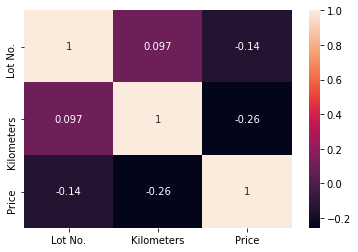

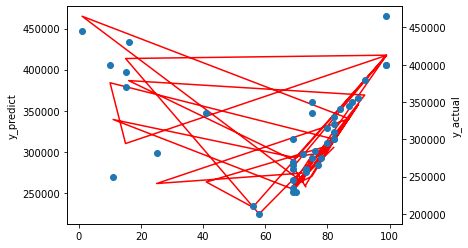

In [73]:
x_select = data[data['Model']=='Duke 200']
x_select['Lot No.'] = pd.to_numeric(x_select['Lot No.'])
x_select['Kilometers'] = pd.to_numeric(x_select['Kilometers'])
x_select['Price'] = pd.to_numeric(x_select['Price'])
x = x_select[['Lot No.', 'Kilometers']]

x.reset_index(drop=True, inplace=True)

y = x_select['Price']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

train_x_ = train_x

# Correlation between features and target
cor = x_select[['Lot No.', 'Kilometers', 'Price']].corr()
import seaborn as sn
sn.heatmap(cor, annot=True)

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2, interaction_only=False)
train_x = pf.fit_transform(train_x)
test_x = pf.fit_transform(test_x)


from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x, train_y)
print(reg.score(test_x, test_y))
y_predict = reg.predict(train_x)

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.scatter(train_x_['Lot No.'], train_y)
ax2.set_xlabel('Lot Number')
ax1.set_ylabel('y_predict')
ax2.set_ylabel('y_actual')
ax1.plot(train_x_['Lot No.'], y_predict,'r-')
plt.show()

### Since, we have many such brands and the model we make differs according to the brand, it would take too long time to prepare model for each brand. So, I have used the same model from above and just selected the model that has score greater than or equal to 0.5.

In [74]:
import warnings
import pickle

for index in indices:

    x_select = data[data['Model']==index]
    x_select['Lot No.'] = pd.to_numeric(x_select['Lot No.'])
    x_select['Kilometers'] = pd.to_numeric(x_select['Kilometers'])
    x_select['Price'] = pd.to_numeric(x_select['Price'])
    x = x_select[['Lot No.', 'Kilometers']]
    
    warnings.filterwarnings('ignore') ## Ignoring the warnings

    x.reset_index(drop=True, inplace=True)

    y = x_select['Price']
    from sklearn.model_selection import train_test_split
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)

    train_x_ = train_x
    
    # Correlation between features and target
#     cor = x_select[['Lot No.', 'Kilometers', 'Price']].corr()
#     import seaborn as sn
#     sn.heatmap(cor, annot=True)

    from sklearn.preprocessing import PolynomialFeatures
    pf = PolynomialFeatures(2, interaction_only=False)
    train_x = pf.fit_transform(train_x)
    test_x = pf.fit_transform(test_x)


    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(train_x, train_y)
    if model.score(test_x, test_y)>=0.5:
        print(index,'score is', model.score(test_x, test_y))
        
        ## Saving the model in a file
        with open(f"C:\\Users\\santo\\PycharmProjects\\MachineLearning\\my models\\hamrobazar models\\{index}", 'wb') as f:
            pickle.dump(model, f)
    
    warnings.filterwarnings('ignore') ## Ignoring the warnings
    
#     y_predict = reg.predict(train_x)
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     ax2.scatter(train_x_['Lot No.'], train_y)
#     ax2.set_xlabel('Lot Number')
#     ax1.set_ylabel('y_predict')
#     ax2.set_ylabel('y_actual')
#     ax1.plot(train_x_['Lot No.'], y_predict,'r-')
#     plt.show()

<ipython-input-74-2ff18de6802d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_select['Lot No.'] = pd.to_numeric(x_select['Lot No.'])
<ipython-input-74-2ff18de6802d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_select['Kilometers'] = pd.to_numeric(x_select['Kilometers'])
<ipython-input-74-2ff18de6802d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Pulsar 150 score is 0.5882915227475463
Dio score is 0.6592803086420829
Pulsar 220F score is 0.5244488515876634
Aviator score is 0.8325942128510999
Duke 200 score is 0.8556709148711235
Duke 250 score is 0.7046358383101409
TNT 300 score is 0.5875310150577263
Hornet 160r score is 0.64882528367018
FZ 250 score is 0.5912450035872641
Duke 390 score is 0.5646724875984681
Pulsar RS 200 score is 0.5366896691051894
Super Splendor score is 0.8824095164830755
302 R score is 0.7920428337157605
SR 150 score is 0.6437929236466058
Ray ZR score is 0.771501535413795
FZ 150 score is 0.9952976828672817


## Predicting the price for hornet 160r

In [75]:
with open(r'C:\Users\santo\PycharmProjects\MachineLearning\my models\hamrobazar models\Hornet 160r', 'rb') as f:
    model = pickle.load(f)

# Lets test the price of hornet bike with Lot No. 88 and Kilometers 15000
test_x = [[88,15000]]

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2, interaction_only=False)
test_x = pf.fit_transform(test_x)

model.predict(test_x)

array([194737.8216522])

## In this way, we can predict the price of second hand bikes. Above, we could not get all the model for all the bikes due to many reasons including less amount of data, inaccurate data, requirement of each trained model for each model of bikes, etc.